# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

Human resources (HR) is a key asset that needs to be effectively managed by a company to achieve its business objectives efficiently and effectively. In this instance, we will address an issue related to the company's human resources. <b>Our focus is to understand how to retain employees within the current company, which can lead to cost savings in recruitment and training for new hires</b>. By identifying the key factors that cause employees to not feel engaged, the company can promptly address these issues by creating relevant programs to address employee concerns.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.model_selection import KFold
kf = KFold(10, shuffle=True, random_state=0)

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from scipy.stats import uniform

import re
import shap

import warnings
warnings.filterwarnings("ignore")

pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

In [2]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [3]:
df.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
129,soreEggs6,105592,Lainnya,Pria,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,4,4.00,0.00,0.00,6.00,+6287725725xxx,soreEggs6451@yahoo.com,Magister,1,NaN,kejelasan_karir,1979-09-14,2011-11-07,2020-2-27,2014-04-07
196,spiritedDunbird4,105997,Belum_menikah,Wanita,FullTime,DevOps Engineer,Mid_level,Kurang,Jakarta Barat,Indeed,3,3.00,5.00,0.00,2.00,+6281913444xxx,spiritedDunbird4070@icloud.com,Sarjana,1,NaN,NaN,1986-11-07,2015-01-05,2020-02-11,-
209,soreTruffle3,105808,Lainnya,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_kurang,Jakarta Timur,Indeed,2,4.00,0.00,0.00,3.00,+6285636782xxx,soreTruffle3888@outlook.com,Magister,1,NaN,NaN,1980-05-08,2014-9-29,2020-02-07,-


#### Data Dictionary:
1. Username: Employee username
2. EnterpriseID: Employee ID
3. StatusPernikahan: Marital status of employee
4. JenisKelamin: Gender of employee
5. StatusKepegawaian: Employment status
6. Pekerjaan: Job role of the employee
7. JenjangKarir: Career progression of the employee
8. PerformancePegawai: Performance of the employee	
9. AsalDaerah: Hometown of the employee
10. HiringPlatform: Platform used by the employee during the hiring process
11. SkorSurveyEngagement: Engagement survey score from the employee
12. SkorKepuasanPegawai: Employee satisfaction score
13. JumlahKeikutsertaanProjek: Number of projects an employee is involved in
14. JumlahKeterlambatanSebulanTerakhir: Number of late arrivals in the last month
15. JumlahKetidakhadiran: Number of total absences
16. NomorHP: Telephone number of the employee
17. Email: Email of the employee
18. TingkatPendidikan: Education level of the employee
19. PernahBekerja: Has worked before
20. IkutProgramLOP: Laptop Ownership Program for employee
21. AlasanResign: Reason for resignation by the employee	
22. TanggalLahir: Date of birth of the employee	
23. TanggalHiring: Date of hiring of the employee
24. TanggalPenilaianKaryawan: Employee evaluation date
25. TanggalResign: Date of resignation

## Exploratory Data Analysis (EDA)

In [4]:
# Check data types and detect the presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [5]:
# Check total null values
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

**Summary:**
- The dataset consists of 287 rows and 25 columns.
- There are missing values in the `SkorKepuasanPegawai` column (5 data points), `JumlahKeikutsertaanProjek` column (3 data points), `JumlahKeterlambatanSebulanTerakhir` column (1 data point), `JumlahKetidakhadiran` column (6 data points), `IkutProgramLOP` column (258 data points), and `AlasanResign` column (66 data points).
- The data type in the `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, and `JumlahKetidakhadiran` columns has been changed to integer because the values are in units.
- The data type in the `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, and `TanggalResign` columns has been changed to datetime.

In [6]:
# Check duplicated data
df.duplicated().sum()

0

In [7]:
# Check duplicated data
df['Username'].duplicated().sum()

2

In [8]:
df[df.duplicated('Username', keep=False)]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.00,5.00,0.00,9.00,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,NaN,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.00,6.00,0.00,17.00,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,NaN,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,4.00,0.00,0.00,12.00,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,NaN,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.00,0.00,0.00,12.00,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,NaN,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


**Summary:**
There are two pairs of employess with the same username. However, these four employees are assumed to be distinct individuals based on data from other columns.

### Statistical Analysis

In [21]:
# Separate categorical and numerical columns

date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

num_cols = []
cat_cols = []

for a, i in df.items():
    if a not in date_cols: # To exclude the date column because it is neither categorical nor numerical in type
        if i.dtype == 'object':
            cat_cols.append(a)
        else:
            num_cols.append(a)

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']
Numerical columns: ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']


#### Categorical Summaries

In [10]:
df[cat_cols].describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [11]:
df[df['AlasanResign'].isna()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
105,scornfulBoa6,111235,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Timur,Indeed,3,3.00,0.00,0.00,1.00,+6281335006xxx,scornfulBoa6602@yahoo.com,Sarjana,1,NaN,NaN,1970-04-24,2013-5-13,2020-1-14,-
187,dopeyGatorade1,110836,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Diversity_Job_Fair,2,3.00,0.00,3.00,10.00,+6285806554xxx,dopeyGatorade1019@gmail.com,Sarjana,1,NaN,NaN,1964-10-12,2010-4-26,2012-03-06,-
189,grudgingMeerkat3,106008,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,CareerBuilder,3,4.00,0.00,0.00,4.00,+6285714869xxx,grudgingMeerkat3383@proton.com,Sarjana,1,NaN,NaN,1986-04-17,2011-01-10,2017-02-03,-
190,mellowPudding2,105441,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Selatan,Employee_Referral,4,4.00,0.00,0.00,3.00,+6281218824xxx,mellowPudding2026@outlook.com,Sarjana,1,NaN,NaN,1980-03-02,2012-03-05,2020-2-21,-
195,boastfulSyrup4,100869,Lainnya,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,3.00,0.00,0.00,2.00,+6281209655xxx,boastfulSyrup4371@yahoo.com,Sarjana,1,NaN,NaN,1981-07-11,2015-06-02,2020-01-04,-
196,spiritedDunbird4,105997,Belum_menikah,Wanita,FullTime,DevOps Engineer,Mid_level,Kurang,Jakarta Barat,Indeed,3,3.00,5.00,0.00,2.00,+6281913444xxx,spiritedDunbird4070@icloud.com,Sarjana,1,NaN,NaN,1986-11-07,2015-01-05,2020-02-11,-
197,pridefulChamois9,101005,Menikah,Wanita,Outsource,Software Engineer (Back End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,3,3.00,0.00,0.00,1.00,+6281276322xxx,pridefulChamois9218@proton.com,Sarjana,1,NaN,NaN,1969-09-08,2014-07-07,2020-01-11,-
198,jumpySeahorse6,110876,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Indeed,3,5.00,5.00,0.00,8.00,+6281959858xxx,jumpySeahorse6149@gmail.com,Sarjana,1,NaN,NaN,1989-06-30,2017-4-20,2020-1-28,-
199,mercifulSmelt7,100520,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,3,3.00,6.00,0.00,2.00,+6283307603xxx,mercifulSmelt7471@proton.com,Sarjana,1,NaN,NaN,1985-09-05,2012-09-05,2020-2-27,-
200,jubilantWildfowl6,105889,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_kurang,Jakarta Barat,Google_Search,3,4.00,0.00,0.00,13.00,+6285783035xxx,jubilantWildfowl6521@yahoo.com,Sarjana,1,NaN,NaN,1977-03-23,2011-11-28,2020-2-22,-


In [12]:
df[df['AlasanResign'] == 'Product Design (UI & UX)']

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
27,pluckyApples4,110566,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,3,5.00,0.00,0.00,15.00,+6281988935xxx,pluckyApples4880@icloud.com,Sarjana,1,NaN,Product Design (UI & UX),1987-04-10,2016-07-06,2020-1-28,2016-08-07
124,dearKitten3,111266,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,3,3.00,0.00,0.00,19.00,+6289679074xxx,dearKitten3235@yahoo.com,Sarjana,1,NaN,Product Design (UI & UX),1989-05-02,2011-9-26,2014-03-02,2017-12-15
147,brainyLlama9,100884,Menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,3,5.00,0.00,0.00,20.00,+6285503547xxx,brainyLlama9557@gmail.com,Sarjana,1,NaN,Product Design (UI & UX),1969-02-09,2012-03-07,2014-02-01,2016-4-24
203,hushedBobolink8,106392,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Selatan,Website,3,5.00,0.00,0.00,9.00,+6285522082xxx,hushedBobolink8263@outlook.com,Sarjana,1,NaN,Product Design (UI & UX),1988-08-29,2012-01-09,2020-02-01,2018-04-01


**Summary:**
- There are 285 employee usernames, with 2 pairs of employees sharing the same username.
- There are 5 marital statuses among employees in the company, namely `Belum_menikah`, `Menikah`, `Lainnya`, `Bercerai`, and `-`.
- There are 167 female employees and 120 male employees.
- The majority of employees have a `FullTime` employment status, followed by `Outsource`, and the fewest have `Internship` status.
- There are 14 different job roles in the company.
- There are 3 career levels: `Freshgraduate_program`,' `Mid_level`, and `Senior_level`.
- There are 5 performance categories for employees: `Sangat_kurang`, `Kurang`, `Biasa`, `Bagus`, and `Sangat_bagus`.
- Employees come from various locations within Jakarta, including `Jakarta Pusat`, `Jakarta Timur`, `Jakarta Barat`, `Jakarta Utara`, and `Jakarta Selatan`.
- There are 9 different hiring platforms used for recruiting employees.
- No employee shares the same phone number or email.
- Employee education levels vary from `Sarjana` (S1) to `Doctor` (S3).
- All employees have previous work experience.
- Reasons for employee resignations vary, including `jam_kerja`, `ganti_karir`, `kejelasan_karir`, `tidak_bisa_remote`, `toxic_culture`, `leadership`, `tidak_bahagia`, `internal_conflict`, `Product Design (UI & UX)`, and `apresiasi`.

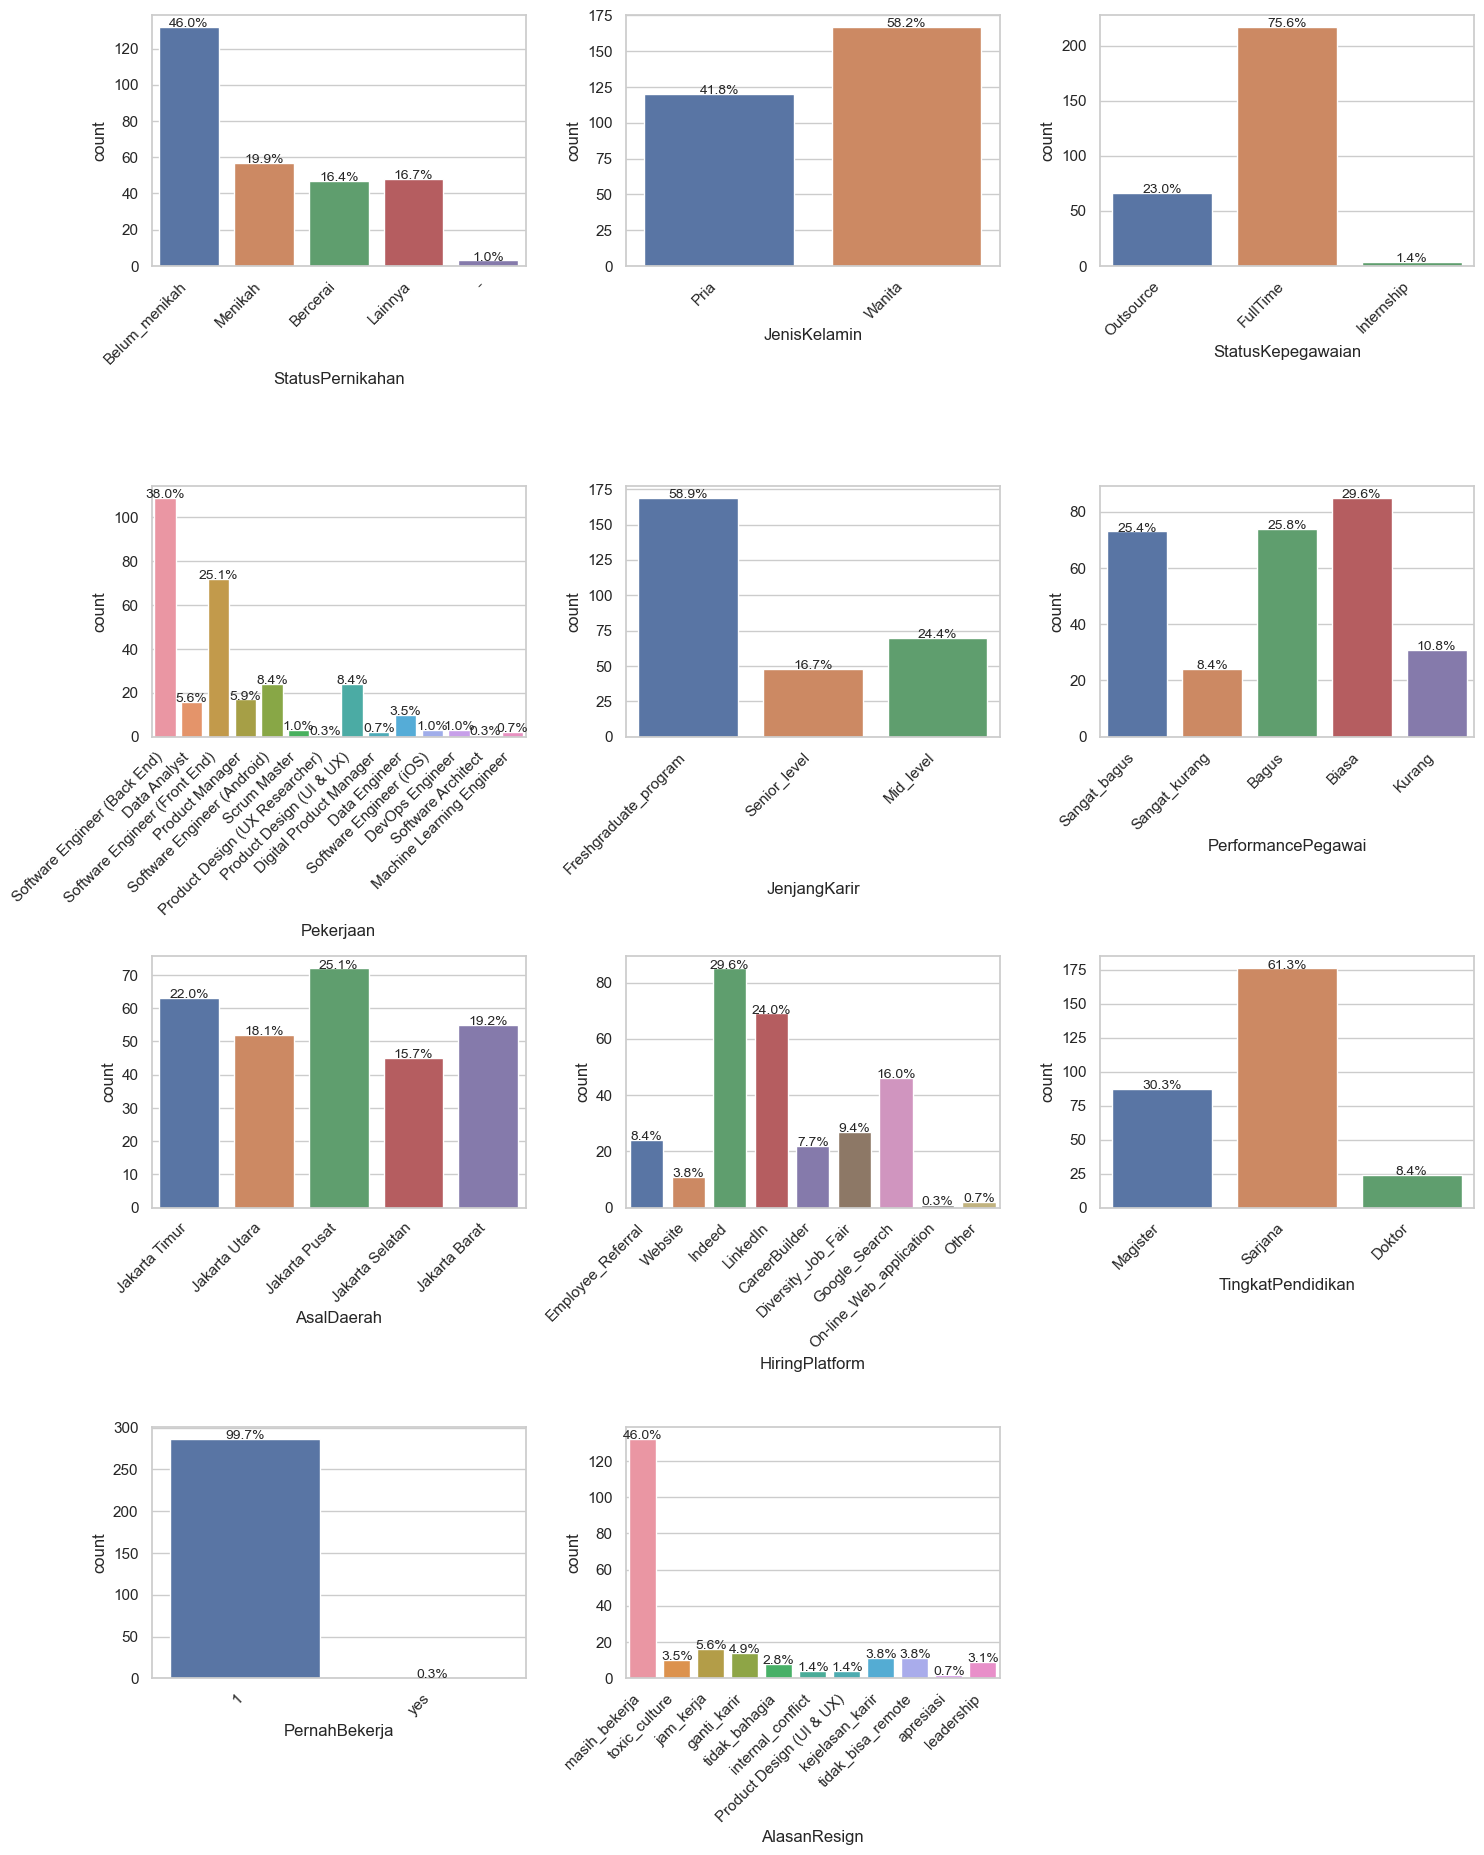

In [14]:
cat_vis_uni = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']

plt.figure(figsize=(15, 50))
for i in range(0, len(cat_vis_uni)):
    plt.subplot(len(cat_vis_uni)//1, 3, i+1)
    ax = sns.countplot(x=df[cat_vis_uni[i]])
    
    total = len(df[cat_vis_uni[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + (p.get_width() / 2) #- 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10,ha='center')
        
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Summary:**
- The most common marital status among employees in the company is `Belum_menikah`, indicates that a significant portion of employees do not have family responsibilities.
- The company is predominantly composed of female employees, although the difference is not significantly different from male employees.
- The most prevalent employment status is `Fulltime` or permanent employees.
- Employees in the role of `Software Engineer (Back End)` are the most numerous, while `Product Design (UX Researcher)` and `Software Architect` roles are the least represented.
- The majority of career levels are in the `Freshgraduate_program`, with the fewest employees in the `Senior_level`. This indicates that a significant portion of employees is at the early career stage in the company.
- Employee performance in the company is quite good, although there are still some employees with lower performance.
- The employees come from various areas in <b>Jakarta</b>, showing a tendency for the company to hire employees from different parts of Jakarta.
- The most common hiring platform for employees is `Indeed`.
- The majority of employees have a Bachelor's degree as their educational background.
- The total number of employees who have resigned is higher than those who have not resigned, accounting for 54% of the total employee count.

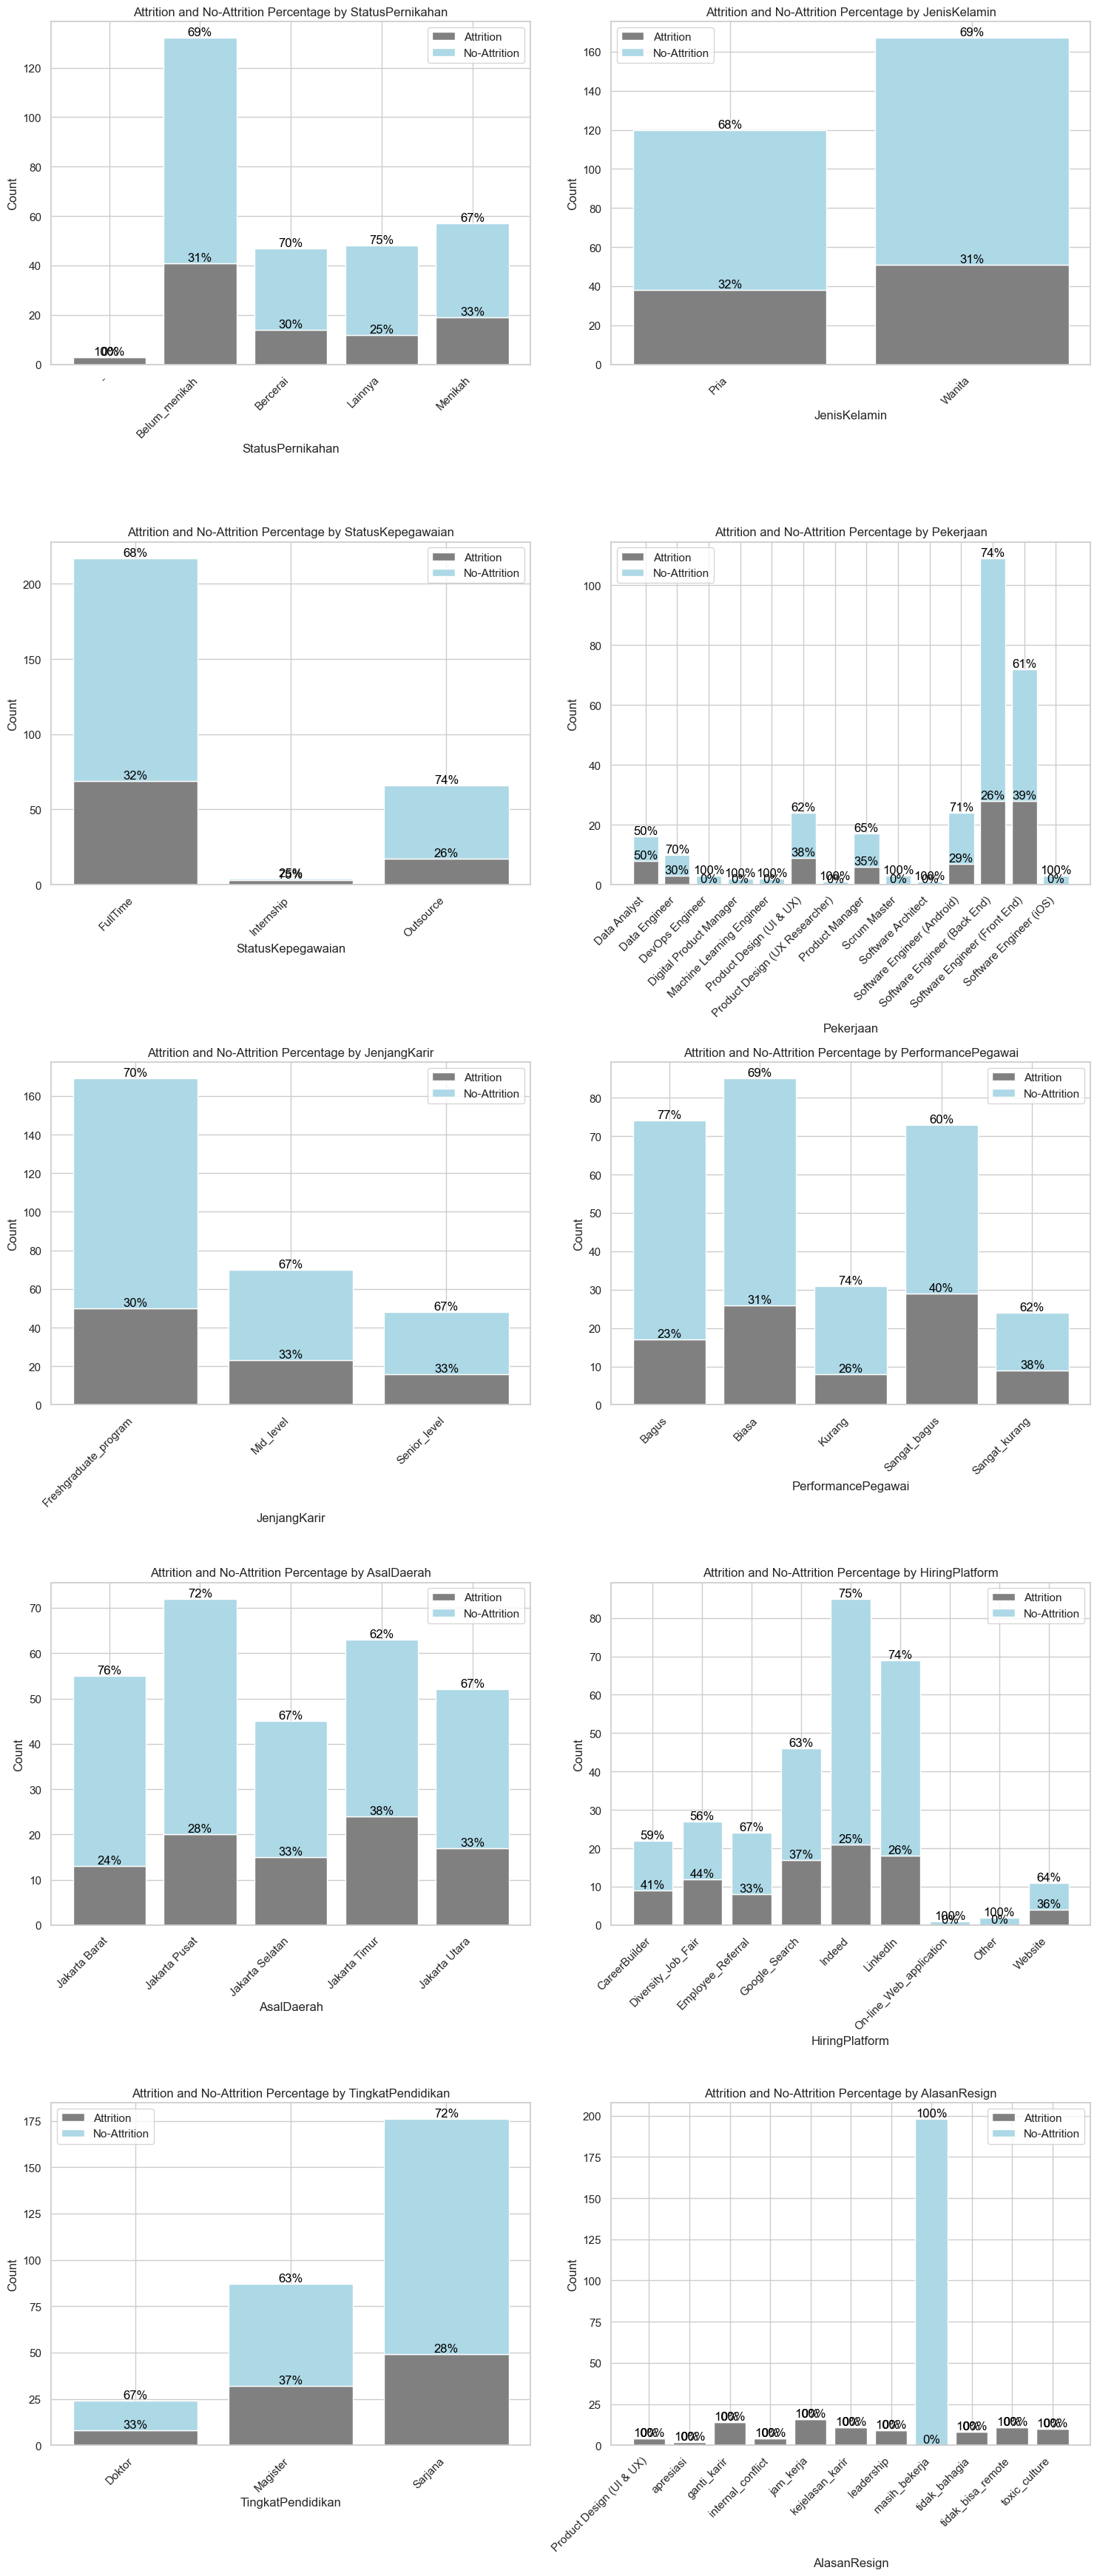

In [18]:
"""
Analysis of categorical columns involves examining the relationship between individual categorical 
features and the target variable. (Bivariate Analysis)
"""

df1 = df.copy()
df1['Attrition'] = df1["TanggalResign"].apply(lambda x : 1 if x != '-' else 0)

cat_vis_biva = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'AlasanResign']

plt.figure(figsize=(15, 35))
for i in range(0, len(cat_vis_biva)):
    plt.subplot(5, 2, i + 1)
    
    count_by_cat = df1[cat_vis_biva[i]].value_counts()
    
    attrition_data = df1.groupby([cat_vis_biva[i], 'Attrition']).size().unstack().fillna(0)
    
    attrition_data['attrition_percentage'] = (attrition_data[1] / (attrition_data[0] + attrition_data[1])) * 100
    attrition_data['no_attrition_percentage'] = (attrition_data[0] / (attrition_data[0] + attrition_data[1])) * 100
    
    plt.bar(attrition_data.index, attrition_data[1], color='grey', label='Attrition')
    plt.bar(attrition_data.index, attrition_data[0], bottom=attrition_data[1], color='lightblue', label='No-Attrition')
    
    for j, (attrition_percentage, no_attrition_percentage) in enumerate(zip(attrition_data['attrition_percentage'], attrition_data['no_attrition_percentage'])):
        plt.text(j, attrition_data[1][j], f'{attrition_percentage:.0f}%', ha='center', va='bottom', color='black')
        plt.text(j, attrition_data[0][j] + attrition_data[1][j], f'{no_attrition_percentage:.0f}%', ha='center', va='bottom', color='black')

    plt.xticks(range(len(attrition_data.index)), attrition_data.index, rotation=45, ha="right")
    plt.xlabel(cat_vis_biva[i])
    plt.ylabel('Count')
    plt.title(f'Attrition and No-Attrition Percentage by {cat_vis_biva[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

**Summary:**
- Employees with a marital status `-` all resigned, while employees with a marital status `Menikah` have a higher resignation rate compared to other marital statuses.
- Both male and female employees have nearly equal resignation rates.
- Employees with `Internship` status have the highest resignation rate, followed by `FullTime` employees, while employees with `Outsource` status have the lowest resignation rate.
- `Data Analyst` is the role with the highest resignation rate, while several other roles such as `DevOps Engineer`, `Digital Product Manager`, `Machine Learning Engineer`, `Product Design (UX Researcher)`, `Scrum Master`, `Software Architect`, and `Software Engineer (iOS)` have no resignation rate.
- Employees at `Mid_level` and `Senior_level` have a higher resignation rate compared to employees at the `Freshgraduate_program` level.
- Employees with a `Sangat Bagus` performance category have the highest resignation rate, followed by the `Sangat Kurang` category.
- Employees originating from East Jakarta have the highest resignation rate compared to other areas.
- Employees hired through the `Diversity_Job_Fair` platform have the highest resignation rate, while employees hired through `On-line_Web_Application` and the `Other` category platforms have no resignation rate.
- Employees with a Master's degree educational background have the highest resignation rate compared to other educational backgrounds.
- Employees who do not resign are those whose resignation reason is `masih_bekerja`.

#### Numerical Summaries

In [17]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.00,105923.32,4044.98,100282.00,101269.00,106069.00,110514.50,111703.00
SkorSurveyEngagement,287.00,3.10,0.84,1.00,3.00,3.00,4.00,5.00
SkorKepuasanPegawai,282.00,3.90,0.91,1.00,3.00,4.00,5.00,5.00
JumlahKeikutsertaanProjek,284.00,1.18,2.29,0.00,0.00,0.00,0.00,8.00
JumlahKeterlambatanSebulanTerakhir,286.00,0.41,1.28,0.00,0.00,0.00,0.00,6.00
JumlahKetidakhadiran,281.00,10.45,6.90,1.00,5.00,10.00,15.00,55.00
IkutProgramLOP,29.00,0.52,0.51,0.00,0.00,1.00,1.00,1.00


**Summary:**
- There are 287 employees in the company, each with a unique ID.
- Employee engagement survey scores range from 0-5, with a predominant score of 3 or higher.
- Employee satisfaction scores range from 0-5, with a predominant score of 3 or higher.
- The number of projects employees are involved in varies from 0-8, with the majority of employees not participating in projects.
- The number of recent lateness incidents among employees ranges from 0-6, with most employees arriving on time in the past month.
- The number of absences among employees ranges from 1-55, with some employees having fewer than 10 absences and others having more than 10 absences.
- There is a higher number of employee data participating in the LOP program.

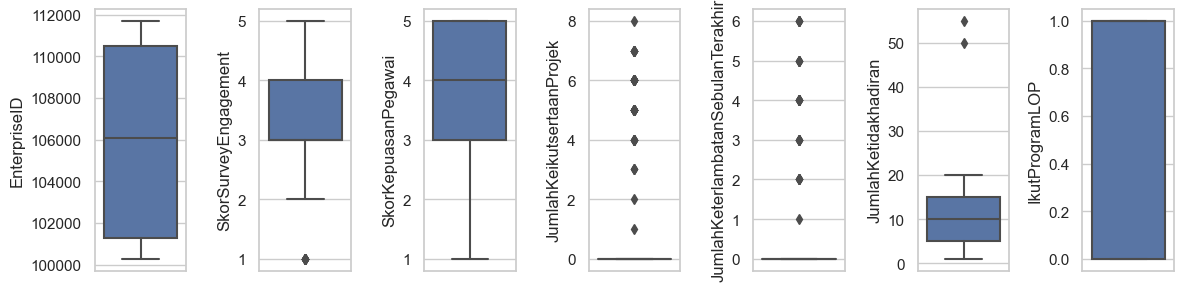

In [18]:
plt.figure(figsize=(12, 3))
for i in range(0, len(num_cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[num_cols[i]], orient='v')
    plt.tight_layout()

In [19]:
outlier_data = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    # Identification of Outliers
    filter_outlier = (df[col] < low_limit) | (df[col] > high_limit)
    num_outliers = filter_outlier.sum()
    num_no_outliers = len(df) - num_outliers

    outlier_data.append({
        "Column Name": col,
        "is Outlier": num_outliers > 0,
        "Outlier": num_outliers,
        "No Outlier": num_no_outliers
    })

outlier_df = pd.DataFrame(outlier_data)
outlier_df

,Column Name,is Outlier,Outlier,No Outlier
0,EnterpriseID,False,0,287
1,SkorSurveyEngagement,True,14,273
2,SkorKepuasanPegawai,False,0,287
3,JumlahKeikutsertaanProjek,True,63,224
4,JumlahKeterlambatanSebulanTerakhir,True,31,256
5,JumlahKetidakhadiran,True,2,285
6,IkutProgramLOP,False,0,287


**Summary:**
- Outliers are present in the columns `SkorSurveyEngagement`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`,  and `JumlahKetidakhadiran`.

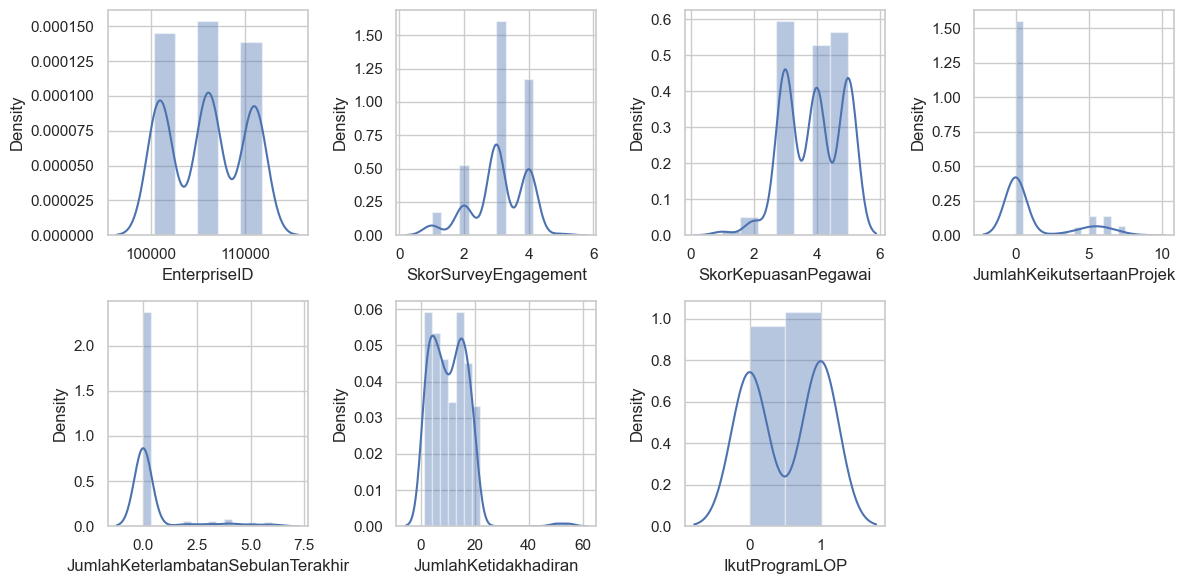

In [20]:
plt.figure(figsize=(12, 6))
for i in range(0, len(num_cols)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

**Summary:**
- `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`: Positively Skewed
- `IkutProgramLOP`: Bimodal Distribution
- `EnterpriseID`, `SkorSurveyEngagement`, `SkorKepuasanPegawai`: Multimodal Distribution

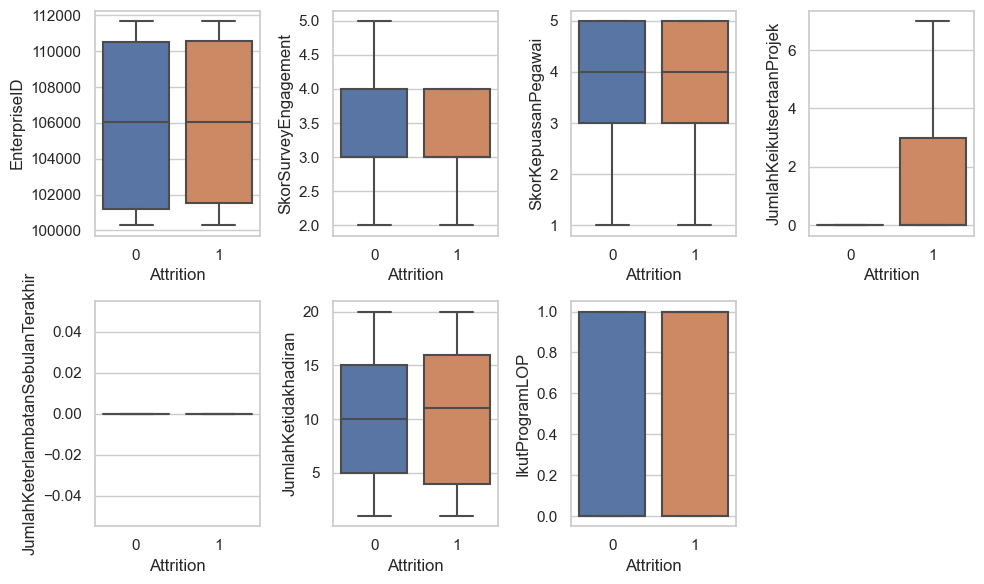

In [24]:
"""
Analysis of numerical columns involves examining the relationship between individual categorical 
features and the target variable. (Bivariate Analysis)
"""

plt.figure(figsize=(10, 6))
for i in range(0, len(num_cols)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y = df1[num_cols[i]], x = df1['Attrition'], orient='v', showfliers = False)
    plt.tight_layout()

**Summary:**
- Employees who resign tend to have a higher level of project involvement compared to those who do not resign.
- Employees with absenteeism levels of less than 5 and more than 15 are more likely to resign.
- However, based on other columns, there is no significant difference between employees who resign and those who do not.

### Business Understanding

#### Annual Report on Employee Number Changes

In [35]:
df1 = df.copy()

Employees with EnterpriseIDs 106480 and 111209 have resignation dates earlier than their hiring dates. It is assumed that there was a human error in inputting the values in these columns, resulting in the values in those two columns being swapped.

In [36]:
df1.loc[df1['EnterpriseID'] == 106480, ['TanggalHiring', 'TanggalResign']] = df1.loc[df1['EnterpriseID'] == 106480, ['TanggalResign', 'TanggalHiring']].values
df1.loc[df1['EnterpriseID'] == 111209, ['TanggalHiring', 'TanggalResign']] = df1.loc[df1['EnterpriseID'] == 111209, ['TanggalResign', 'TanggalHiring']].values

In [37]:
df1['TahunHiring'] = df1['TanggalHiring'].apply(lambda x: pd.to_datetime(x).year)
df1['TahunResign'] = df1['TanggalResign'].apply(lambda x: pd.to_datetime(x).year if x != '-' else x)

In [38]:
df1['TahunResign'] = df1['TahunResign'].replace('-', pd.NA)
result_table = pd.concat([df1['TahunHiring'].value_counts(), df1['TahunResign'].value_counts()], axis=1, keys=['TotalHiring', 'TotalResign']).fillna(0).astype(int)
result_table.reset_index(inplace=True)
result_table.rename(columns={'index': 'Tahun'}, inplace=True)
result_table = result_table.sort_values(by='Tahun').reset_index(drop=True)
result_table['TotalPegawai'] = result_table['TotalPegawai'] - result_table['TotalResign']
result_table['TotalPegawai'] = result_table['TotalPegawai'].cumsum()
result_table['Perubahan'] = result_table['TotalPegawai'].diff()
result_table.fillna(1).astype(int)

,Tahun,TotalHiring,TotalResign,TotalPegawai,Perubahan
0,2006,1,0,1,1
1,2007,2,0,3,2
2,2008,2,0,5,2
3,2009,7,0,12,7
4,2010,8,0,20,8
5,2011,76,0,96,76
6,2012,41,0,137,41
7,2013,44,4,177,40
8,2014,57,11,223,46
9,2015,30,9,244,21


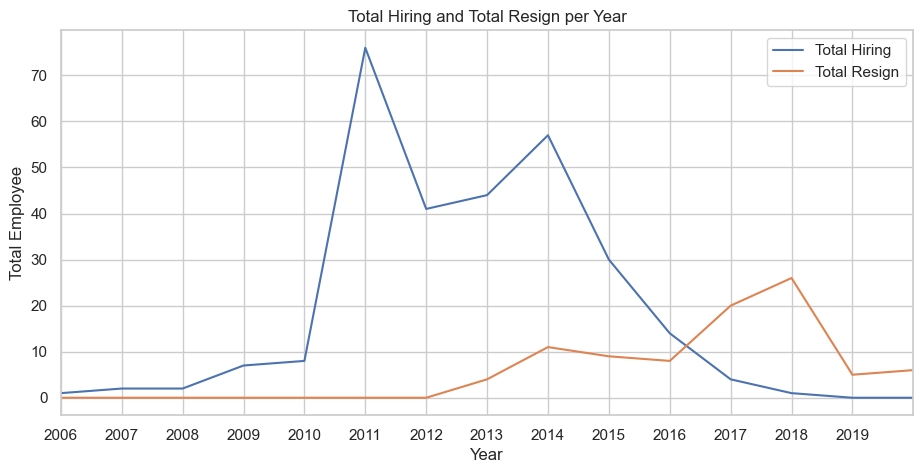

In [43]:
plt.figure(figsize=(11, 5))
plt.plot(result_table['Tahun'], result_table['TotalHiring'], label='Total Hiring')
plt.plot(result_table['Tahun'], result_table['TotalResign'], label='Total Resign')
plt.xlabel('Year')
plt.xlim(2006, 2020) 
plt.xticks(range(2006, 2020, 1))
plt.ylabel('Total Employee')
plt.legend()
plt.title('Total Hiring and Total Resign per Year')
plt.show()

In [41]:
tahun = result_table['Tahun']
total_bertahan = result_table['Perubahan']
perubahan = result_table['TotalPegawai']

fig = go.Figure(go.Waterfall(
    name = "Total Employee",
    orientation = "v",
    measure = ["relative"] * len(tahun),
    x = tahun,
    textposition = "outside",
    y = total_bertahan,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color": "blue", "width": 3}}}
))

fig.update_layout(title = "Waterfall Chart", showlegend = True)
fig.show()

**Summary:**
- The total number of employees hired by the company saw an increase from 2006 to 2014, with the most significant increase occurring in 2011. Although there was a decrease in the total number of employees hired in 2012, this may be attributed to the full capacity of available positions after active recruitment in the preceding years, supported by the fact that no employees resigned from 2006 to 2012. The increase in employees hired in 2013 and 2014, on the other hand, was due to the beginning of employee resignations in those years.
- The total number of resigning employees continued to rise steadily until 2020, with the highest number of employee resignations occurring in 2018.
- From 2017 to 2020, the company faced a concerning trend as the number of employees resigning surpassed the number of new hires. This was a departure from the previous healthy years when more employees were hired than left the company. This shift is further highlighted by the continuous growth in total employees from 2006 to 2016, followed by a decline from 2017 to 2020.

#### Resign Reason Analysis for Employee Attrition Management Strategy

In [34]:
df_resigned = df[df['TanggalResign'] != '-']
df_not_resigned = df[df['TanggalResign'] == '-']

In [35]:
df_not_resigned['AlasanResign'].fillna(df_not_resigned.groupby('TanggalResign')['AlasanResign'].transform(lambda x: x.fillna(x.mode().iloc[0])), inplace=True)

Filling missing values in the `AlasanResign` column with values from rows that have the same `TanggalResign`
> Filling missing values with `masih_bekerja` because all missing values have `TanggalResign` as `-` and rows with `TanggalResign` as `-` and non-missing `AlasanResign` values are set to `masih_bekerja`.

In [36]:
df_combined = pd.concat([df_not_resigned['Pekerjaan'].value_counts(), df_resigned['Pekerjaan'].value_counts()], axis=1, keys=['PegawaiBertahan', 'PegawaiResign']).fillna(0).astype(int)
df_combined.reset_index(inplace=True)
df_combined.rename(columns={'index': 'Pekerjaan'}, inplace=True)
df_combined

,Pekerjaan,PegawaiBertahan,PegawaiResign
0,Software Engineer (Back End),81,28
1,Software Engineer (Front End),44,28
2,Software Engineer (Android),17,7
3,Product Design (UI & UX),15,9
4,Product Manager,11,6
5,Data Analyst,8,8
6,Data Engineer,7,3
7,Scrum Master,3,0
8,Software Engineer (iOS),3,0
9,DevOps Engineer,3,0


In [37]:
df_combined['JumlahPegawai'] = df_combined['PegawaiBertahan'] + df_combined['PegawaiResign']
df_combined['PersentasePegawaiBertahan'] = (df_combined['PegawaiBertahan'] / df_combined['JumlahPegawai']) * 100
df_combined

,Pekerjaan,PegawaiBertahan,PegawaiResign,JumlahPegawai,PersentasePegawaiBertahan
0,Software Engineer (Back End),81,28,109,74.31
1,Software Engineer (Front End),44,28,72,61.11
2,Software Engineer (Android),17,7,24,70.83
3,Product Design (UI & UX),15,9,24,62.50
4,Product Manager,11,6,17,64.71
5,Data Analyst,8,8,16,50.00
6,Data Engineer,7,3,10,70.00
7,Scrum Master,3,0,3,100.00
8,Software Engineer (iOS),3,0,3,100.00
9,DevOps Engineer,3,0,3,100.00


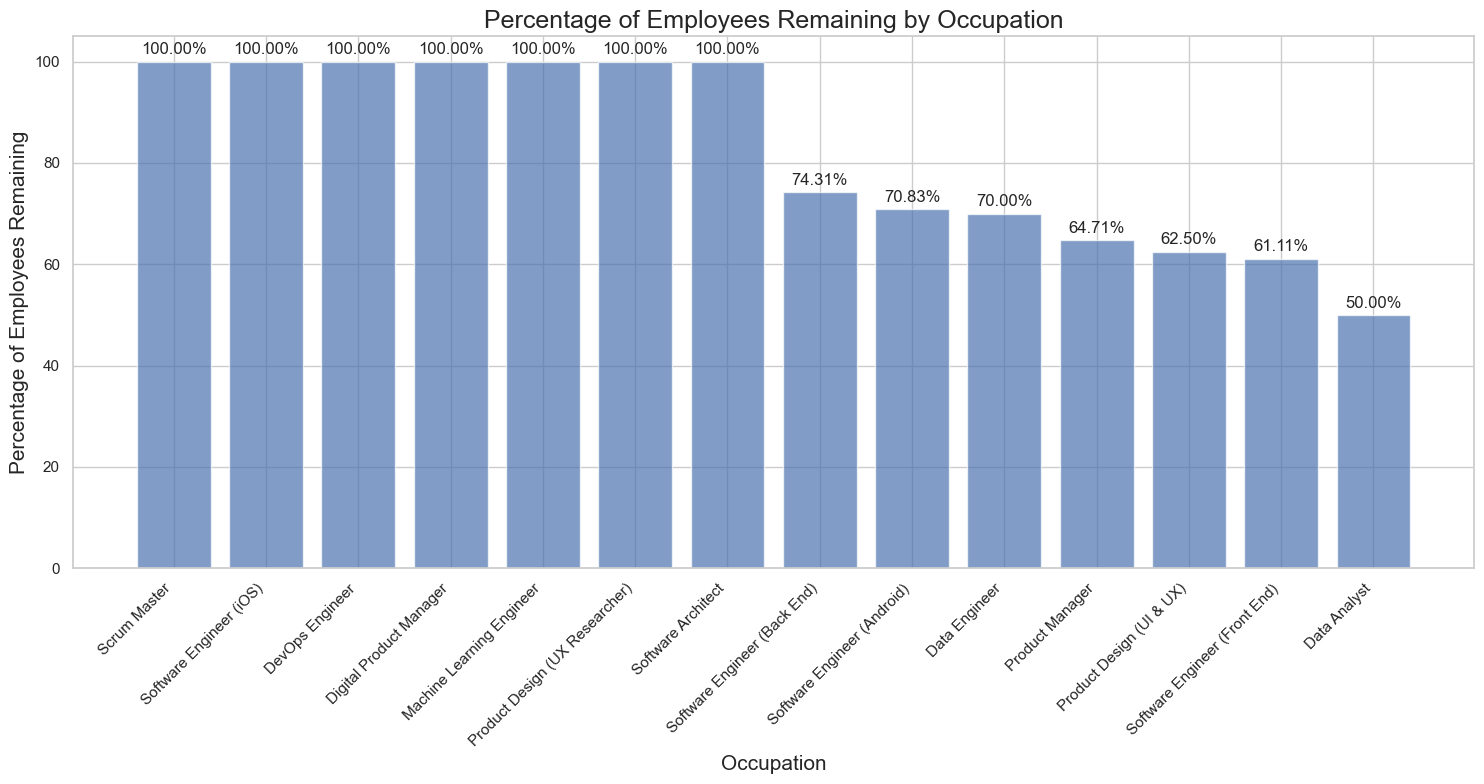

In [57]:
df_sorted = df_combined.sort_values(by='PersentasePegawaiBertahan', ascending=False)
pekerjaan = df_sorted['Pekerjaan']
persentase_pegawai_bertahan = df_sorted['PersentasePegawaiBertahan']

plt.figure(figsize=(15, 8))
bars = plt.bar(pekerjaan, persentase_pegawai_bertahan, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Percentage of Employees Remaining', fontsize=15)
plt.title('Percentage of Employees Remaining by Occupation', fontsize=18)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insight:**
- `DevOps Engineer`, `Digital Product Manager`, `Machine Learning Engineer`, `Product Design (UX Researcher)`, `Scrum Master`, `Software Architect`, and `Software Engineer (iOS)` have no resignation rate, while `Data Analyst` has the highest resignation rate.

In [52]:
resigned_da = df_resigned[df_resigned['Pekerjaan'] == 'Data Analyst']
resigned_da = resigned_da.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahPegawai')
resigned_da

,JenjangKarir,PerformancePegawai,AlasanResign,JumlahPegawai
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [54]:
fig = px.sunburst(resigned_da, path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='JumlahPegawai')
fig.update_layout(title='Sunburst Plot of Resigned Data Analysts', margin=dict(t=50, l=0, r=0, b=0))
fig.show()

**Insight:**
Employees with the role of Analyst who resign all have a career level of `Freshgraduate_program` (the early career stage in the company) with employee performance ranging from `Sangat_kurang`, `Biasa`, `Bagus`, to `Sangat_bagus`. The reasons given for their resignations are related to `internal_conflict` and `toxic_culture`. However, employees with `Sangat_bagus` performance and `toxic_culture` as the resignation reason have the highest proportion (38%) compared to other categories. Based on this, recommendations can be provided to the company to retain employees, especially those with excellent performance. These recommendations include prioritizing improved communication, ensuring a safe working environment both emotionally and physically, and actively seeking feedback from employees to make necessary improvements (source: wheniwork.com).

## Data Preprocessing

In [3]:
# Creating a target column is done to facilitate the subsequent steps in the process.
df['Attrition'] = df['TanggalResign'].apply(lambda x : 1 if x != '-' else 0)

### Data Splitting

Data splitting is performed before other preprocessing to avoid leakage between the data used for building the model (training data) and the data used to test the model (testing data). Data splitting is done with an 80:20 ratio between training data and test data due to limitations in the data volume, maximizing its use in constructing the model.

In [4]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[['Attrition']], random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_test.shape)

(229, 26)
(58, 26)


In [5]:
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

### Handling Missing Values

In [6]:
# Check for null values in the training dataset
df_train.isnull().sum()[df_train.isnull().sum() > 0]

SkorKepuasanPegawai                     3
JumlahKeikutsertaanProjek               2
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    5
IkutProgramLOP                        210
AlasanResign                           52
dtype: int64

**Summary:**
- There are missing values in the `SkorKepuasanPegawai` column (3 data points), `JumlahKeikutsertaanProjek` column (2 data points), `JumlahKeterlambatanSebulanTerakhir` column (1 data points), `JumlahKetidakhadiran` column (5 data points), `IkutProgramLOP` column (210 data points), and `AlasanResign` column (52 data points).

In [7]:
# Check for null values in the testing dataset
df_test.isnull().sum()[df_test.isnull().sum() > 0]

SkorKepuasanPegawai           2
JumlahKeikutsertaanProjek     1
JumlahKetidakhadiran          1
IkutProgramLOP               48
AlasanResign                 14
dtype: int64

**Summary:**
- There are missing values in the `SkorKepuasanPegawai` column (2 data points), `JumlahKeikutsertaanProjek` column (1 data points), `JumlahKetidakhadiran` column (1 data points), `IkutProgramLOP` column (48 data points), and `AlasanResign` column (14 data points).

In [8]:
# Check for null values in the datasets used for model evaluation
df.isnull().sum()[df.isnull().sum() > 0]

SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
IkutProgramLOP                        258
AlasanResign                           66
dtype: int64

**Summary:**
- There are missing values in the `SkorKepuasanPegawai` column (5 data points), `JumlahKeikutsertaanProjek` column (3 data points), `JumlahKeterlambatanSebulanTerakhir` column (1 data points), `JumlahKetidakhadiran` column (6 data points), `IkutProgramLOP` column (258 data points), and `AlasanResign` column (66 data points).

**How to handle the missing values:**
- Missing values in the `AlasanResign column` will be imputating based on the values within a subset of the data.
> This process entails replacing missing values in the `AlasanResign` column with values from data entries that share the same TanggalResign value.
- Missing values in the `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, and `JumlahKetidakhadiran` columns will be imputed using the median value.
- The `IkutProgramLOP` column will be dropped since the number of missing values exceeds 89%, and imputation might introduce bias into the data.

#### Handle Missing Values in The Training Datasets

In [9]:
# Impute using modus value from subset data for AlasanResign column
df_train['AlasanResign'].fillna(df_train.groupby('TanggalResign')['AlasanResign'].transform(lambda x: x.fillna(x.mode().iloc[0])), inplace=True)

# Impute using median value for SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran columns
df_train['SkorKepuasanPegawai'].fillna(df_train['SkorKepuasanPegawai'].median(), inplace=True)
df_train['JumlahKeikutsertaanProjek'].fillna(df_train['JumlahKeikutsertaanProjek'].median(), inplace=True)
df_train['JumlahKeterlambatanSebulanTerakhir'].fillna(df_train['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df_train['JumlahKetidakhadiran'].fillna(df_train['JumlahKetidakhadiran'].median(), inplace=True)

# Drop the IkutProgramLOP column
df_train.drop('IkutProgramLOP', axis=1, inplace=True)

In [10]:
# Check for null values in the training dataset
null_counts = df_train.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the dataset.


#### Handle Missing Values in The Testing Datasets

In [11]:
# Impute using modus value from subset data for AlasanResign column
df_test['AlasanResign'].fillna(df_test.groupby('TanggalResign')['AlasanResign'].transform(lambda x: x.fillna(x.mode().iloc[0])), inplace=True)

# Impute using median value for SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran columns
df_test['SkorKepuasanPegawai'].fillna(df_test['SkorKepuasanPegawai'].median(), inplace=True)
df_test['JumlahKeikutsertaanProjek'].fillna(df_test['JumlahKeikutsertaanProjek'].median(), inplace=True)
df_test['JumlahKeterlambatanSebulanTerakhir'].fillna(df_test['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df_test['JumlahKetidakhadiran'].fillna(df_test['JumlahKetidakhadiran'].median(), inplace=True)

# Drop the IkutProgramLOP column
df_test.drop('IkutProgramLOP', axis=1, inplace=True)

In [12]:
# Check for null values in the testing dataset
null_counts = df_test.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the dataset.


#### Handle Missing Values in The Datasets Used for Model Evaluation

In [13]:
# Impute using modus value from subset data for AlasanResign column
df['AlasanResign'].fillna(df.groupby('TanggalResign')['AlasanResign'].transform(lambda x: x.fillna(x.mode().iloc[0])), inplace=True)

# Impute using median value for SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran columns
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)

# Drop the IkutProgramLOP column
df.drop('IkutProgramLOP', axis=1, inplace=True)

In [14]:
# Check for null values in the datasets used for model evaluation
null_counts = df.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the dataset.


### Handling Duplicated Values

In [15]:
# Handling duplicated values in the training dataset
print("Number of rows before removing duplicates:", len(df_train))
print("Number of rows after removing duplicates:", len(df_train.drop_duplicates()))

Number of rows before removing duplicates: 229
Number of rows after removing duplicates: 229


In [16]:
# Handling duplicated values in the testing dataset
print("Number of rows before removing duplicates:", len(df_test))
print("Number of rows after removing duplicates:", len(df_test.drop_duplicates()))

Number of rows before removing duplicates: 58
Number of rows after removing duplicates: 58


In [17]:
# Handling duplicated values in the datasets used for model evaluation
print("Number of rows before removing duplicates:", len(df))
print("Number of rows after removing duplicates:", len(df.drop_duplicates()))

Number of rows before removing duplicates: 287
Number of rows after removing duplicates: 287


**Summary:**
- The datasets contain no duplicates, so there is no need to handle duplicated values.

### Handling Invalid Values

**Includes:**
- Swapping invalid values in the `TanggalHiring` and `TanggalResign` columns for employees with EnterpriseIDs <b>106480</b> and <b>111209</b>, as their resignation dates are earlier than their hiring dates. This is assumed to be due to a human error in data entry. 
- Changing invalid values in the `StatusPernikahan` column for entries with `Lainnya` and `-` to `Belum_menikah`, assuming that these employees do not plan to get married.
- Updating the `AlasanResign` for `Product Design (UI & UX)` to `ganti_karir` for roles other than `Product Design (UI & UX)` and `kejelasan_karir` for `Product Design (UI & UX)` roles. This is based on the assumption that `Product Design (UI & UX)` employees may lack career clarity and other employees want to switch careers to `Product Design (UI & UX)`.
- Converting data types in the `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, and `JumlahKetidakhadiran` columns to integers, as the values are in units.
- Changing data types in the `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, and `TanggalResign` columns to datetime.
- Dropping the `PernahBekerja` column as it has a constant value of 1, indicating it's not an important feature for distinguishing between employees who resign and those who do not.

#### Handle Invalid Values in The Training Dataset

In [18]:
# Swapping invalid values in the TanggalHiring and TanggalResign columns for employees with EnterpriseIDs 106480 and 111209
df_train.loc[df_train['EnterpriseID'] == 106480, ['TanggalHiring', 'TanggalResign']] = df_train.loc[df_train['EnterpriseID'] == 106480, ['TanggalResign', 'TanggalHiring']].values
df_train.loc[df_train['EnterpriseID'] == 111209, ['TanggalHiring', 'TanggalResign']] = df_train.loc[df_train['EnterpriseID'] == 111209, ['TanggalResign', 'TanggalHiring']].values

# Replacing values in the StatusPernikahan column
df_train['StatusPernikahan'] = df_train['StatusPernikahan'].replace({
    'Lainnya': 'Belum_menikah',
    '-': 'Belum_menikah'
})

# Replacing values in the AlasanResign column
df_train.loc[(df_train['Pekerjaan'] == 'Product Design (UI & UX)') & (df_train['AlasanResign'] == 'Product Design (UI & UX)'), 'AlasanResign'] = 'ganti_karir'
df_train.loc[(df_train['Pekerjaan'] != 'Product Design (UI & UX)') & (df_train['AlasanResign'] == 'Product Design (UI & UX)'), 'AlasanResign'] = 'kejelasan_karir'

# Change data type SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran columns to integers
df_train['SkorKepuasanPegawai'] = df_train['SkorKepuasanPegawai'].astype(int)
df_train['JumlahKeikutsertaanProjek'] = df_train['JumlahKeikutsertaanProjek'].astype(int)
df_train['JumlahKeterlambatanSebulanTerakhir'] = df_train['JumlahKeterlambatanSebulanTerakhir'].astype(int)
df_train['JumlahKetidakhadiran'] = df_train['JumlahKetidakhadiran'].astype(int)

# Change data type TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, and TanggalResign columns to datetime
df_train['TanggalLahir'] = pd.to_datetime(df_train['TanggalLahir'])
df_train['TanggalHiring'] = pd.to_datetime(df_train['TanggalHiring'])
df_train['TanggalPenilaianKaryawan'] = pd.to_datetime(df_train['TanggalPenilaianKaryawan'])
df_train['TanggalResign'] = df_train['TanggalResign'].apply(lambda x: pd.to_datetime(x) if x != '-' else x)

# Drop the PernahBekerja column
df_train.drop('PernahBekerja', axis=1, inplace=True)

#### Handle Invalid Values in The Testing Dataset

In [19]:
# Swapping invalid values in the TanggalHiring and TanggalResign columns for employees with EnterpriseIDs 106480 and 111209
df_test.loc[df_test['EnterpriseID'] == 106480, ['TanggalHiring', 'TanggalResign']] = df_test.loc[df_test['EnterpriseID'] == 106480, ['TanggalResign', 'TanggalHiring']].values
df_test.loc[df_test['EnterpriseID'] == 111209, ['TanggalHiring', 'TanggalResign']] = df_test.loc[df_test['EnterpriseID'] == 111209, ['TanggalResign', 'TanggalHiring']].values

# Replacing values in the StatusPernikahan column
df_test['StatusPernikahan'] = df_test['StatusPernikahan'].replace({
    'Lainnya': 'Belum_menikah',
    '-': 'Belum_menikah'
})

# Replacing values in the AlasanResign column
df_test.loc[(df_test['Pekerjaan'] == 'Product Design (UI & UX)') & (df_test['AlasanResign'] == 'Product Design (UI & UX)'), 'AlasanResign'] = 'ganti_karir'
df_test.loc[(df_test['Pekerjaan'] != 'Product Design (UI & UX)') & (df_test['AlasanResign'] == 'Product Design (UI & UX)'), 'AlasanResign'] = 'kejelasan_karir'

# Change data type SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran columns to integers
df_test['SkorKepuasanPegawai'] = df_test['SkorKepuasanPegawai'].astype(int)
df_test['JumlahKeikutsertaanProjek'] = df_test['JumlahKeikutsertaanProjek'].astype(int)
df_test['JumlahKeterlambatanSebulanTerakhir'] = df_test['JumlahKeterlambatanSebulanTerakhir'].astype(int)
df_test['JumlahKetidakhadiran'] = df_test['JumlahKetidakhadiran'].astype(int)

# Change data type TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, and TanggalResign columns to datetime
df_test['TanggalLahir'] = pd.to_datetime(df_test['TanggalLahir'])
df_test['TanggalHiring'] = pd.to_datetime(df_test['TanggalHiring'])
df_test['TanggalPenilaianKaryawan'] = pd.to_datetime(df_test['TanggalPenilaianKaryawan'])
df_test['TanggalResign'] = df_test['TanggalResign'].apply(lambda x: pd.to_datetime(x) if x != '-' else x)

# Drop the PernahBekerja column
df_test.drop('PernahBekerja', axis=1, inplace=True)

#### Handle Invalid Values in The Dataset Used for Model Evaluation

In [20]:
# Swapping invalid values in the TanggalHiring and TanggalResign columns for employees with EnterpriseIDs 106480 and 111209
df.loc[df['EnterpriseID'] == 106480, ['TanggalHiring', 'TanggalResign']] = df.loc[df['EnterpriseID'] == 106480, ['TanggalResign', 'TanggalHiring']].values
df.loc[df['EnterpriseID'] == 111209, ['TanggalHiring', 'TanggalResign']] = df.loc[df['EnterpriseID'] == 111209, ['TanggalResign', 'TanggalHiring']].values

# Replacing values in the StatusPernikahan column
df['StatusPernikahan'] = df['StatusPernikahan'].replace({
    'Lainnya': 'Belum_menikah',
    '-': 'Belum_menikah'
})

# Replacing values in the AlasanResign column
df.loc[(df['Pekerjaan'] == 'Product Design (UI & UX)') & (df['AlasanResign'] == 'Product Design (UI & UX)'), 'AlasanResign'] = 'ganti_karir'
df.loc[(df['Pekerjaan'] != 'Product Design (UI & UX)') & (df['AlasanResign'] == 'Product Design (UI & UX)'), 'AlasanResign'] = 'kejelasan_karir'

# Change data type SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran columns to integers
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].astype(int)
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].astype(int)
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].astype(int)
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].astype(int)

# Change data type TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, and TanggalResign columns to datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = df['TanggalResign'].apply(lambda x: pd.to_datetime(x) if x != '-' else x)

# Drop the PernahBekerja column
df.drop('PernahBekerja', axis=1, inplace=True)

In [21]:
print(f'Total number of null values in the training dataset: {df_train.isna().sum().sum()}')
print(f'Total number of duplicated values in the training dataset: {df_train.duplicated().sum()}', end='\n\n')

print(f'Total number of null values in the testing dataset: {df_test.isna().sum().sum()}')
print(f'Total number of duplicated values in the testing dataset: {df_test.duplicated().sum()}')

Total number of null values in the training dataset: 0
Total number of duplicated values in the training dataset: 0

Total number of null values in the testing dataset: 0
Total number of duplicated values in the testing dataset: 0


### Feature Extraction

1. <b>Umur Column</b>, which represents the employee's age at the time of assessment, is calculated by subtracting the year of the `TanggalPenilaian` column from the year of the`TanggalLahir` column.

In [22]:
df_train['Umur'] = df_train['TanggalPenilaianKaryawan'].dt.year - df_train['TanggalLahir'].dt.year
df_test['Umur'] = df_test['TanggalPenilaianKaryawan'].dt.year - df_test['TanggalLahir'].dt.year
df['Umur'] = df['TanggalPenilaianKaryawan'].dt.year - df['TanggalLahir'].dt.year

2. <b>LamaBekerja</b>, which is the number of years an employee has worked. 
    - For employees who have not resigned, the length of employment is calculated by subtracting the year of the `TanggalPenilaian` column from the year in the `TanggalHiring` column. 
    - For employees who have resigned, the length of employment is calculated by subtracting the year of the `TanggalResign` column from the year in the `TanggalHiring` column.  

In [23]:
# lama bekerja
def hitung_lama_bekerja(row):
    if row['TanggalResign'] == '-':
        return row['TanggalPenilaianKaryawan'].year - row['TanggalHiring'].year
    else:
        return row['TanggalResign'].year - row['TanggalHiring'].year
    
df_train['LamaBekerja'] = df_train.apply(hitung_lama_bekerja, axis=1)
df_test['LamaBekerja'] = df_test.apply(hitung_lama_bekerja, axis=1)
df['LamaBekerja'] = df.apply(hitung_lama_bekerja, axis=1)

3. <b>Kepuasan-Keluhan</b>, is a combined column derived from the `SkorKepuasanPegawai` column and an extraction from the `AlasanResign` column. The reason from for resignation is extracted to obtain complaints data, allowing it to be available when assessments are conducted not only for resigning employees but also for those who do not resign. This enables the company to perform evaluations and improvements as a preventive measure to retain existing employees.

In [24]:
# Extract Keluhan from AlasanResign column
map_keluhan = {
    'apresiasi': 'Manajemen', 
    'ganti_karir': 'Karir', 
    'internal_conflict': 'LingkunganKerja', 
    'jam_kerja': 'KebijakanPerusahaan', 
    'kejelasan_karir': 'Karir', 
    'leadership': 'Manajemen', 
    'masih_bekerja': 'TidakAdaKeluhan', 
    'tidak_bahagia': 'LingkunganKerja', 
    'tidak_bisa_remote': 'KebijakanPerusahaan', 
    'toxic_culture': 'LingkunganKerja'
} 

df_train['Keluhan'] = df_train['AlasanResign'].map(map_keluhan)
df_test['Keluhan'] = df_test['AlasanResign'].map(map_keluhan)
df['Keluhan'] = df['AlasanResign'].map(map_keluhan)

# Kepuasan - Keluhan Column
df_train['Kepuasan-Keluhan'] = df_train['SkorKepuasanPegawai'].astype(str) + '-' + df_train['Keluhan']
df_test['Kepuasan-Keluhan'] = df_test['SkorKepuasanPegawai'].astype(str) + '-' + df_test['Keluhan']
df['Kepuasan-Keluhan'] = df['SkorKepuasanPegawai'].astype(str) + '-' + df['Keluhan']

### Handling Outliers

Here are some methods used for handling outliers:
1. IQR (Interquartile Range)
2. Z-Score
3. Manually Trimmed

In [25]:
nums = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 
        'JumlahKetidakhadiran', 'Umur', 'LamaBekerja']

for x in df[nums].columns :
    uniq = list(df[nums][x].unique())
    uniq.sort()

    print (f'Column {x}:')
    if len(uniq) > 0:
        unq = list(uniq[:])
        print (f'{uniq}')
    else:
        print (f'{uniq}')
    print("--" * 50, end='\n\n')

Column SkorSurveyEngagement:
[1, 2, 3, 4, 5]
----------------------------------------------------------------------------------------------------

Column SkorKepuasanPegawai:
[1, 2, 3, 4, 5]
----------------------------------------------------------------------------------------------------

Column JumlahKeikutsertaanProjek:
[0, 1, 2, 3, 4, 5, 6, 7, 8]
----------------------------------------------------------------------------------------------------

Column JumlahKeterlambatanSebulanTerakhir:
[0, 1, 2, 3, 4, 5, 6]
----------------------------------------------------------------------------------------------------

Column JumlahKetidakhadiran:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 50, 55]
----------------------------------------------------------------------------------------------------

Column Umur:
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 64,

From the available numerical columns, only the `JumlahKetidakhadiran` column exhibits extremely high values. Meanwhile, the distribution of values in other columns remains within a relatively consistent range. Therefore, we will only apply an outlier handling process to the `JumlahKetidakhadiran` column. 
> In the manually trimmed method, we will include a condition where values greater than or equal to 50 are considered as outliers, as the values in the other columns are well below 20.

#### Handling Outliers in The Training Dataset

In [26]:
# Using IQR
train_iqr = df_train.copy()
print(f'The number of rows before filtering out the outliers using IQR: {len(train_iqr)}')
filtered_entries = np.array([True] * len(train_iqr))
Q1 = train_iqr['JumlahKetidakhadiran'].quantile(0.25)
Q3 = train_iqr['JumlahKetidakhadiran'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
filtered_entries = ((train_iqr['JumlahKetidakhadiran'] >= low_limit) & (train_iqr['JumlahKetidakhadiran'] <= high_limit)) & filtered_entries
train_iqr = train_iqr[filtered_entries]
print(f'The number of rows after filtering out the outliers using IQR: {len(train_iqr)}')

# Using Z-Score
from scipy import stats
train_zscore = df_train.copy()
print(f'The number of rows before filtering out the outliers using Z-Score: {len(train_zscore)}')
filtered_entries = np.array([True] * len(train_zscore))
zscore = abs(stats.zscore(train_zscore['JumlahKetidakhadiran'])) 
filtered_entries = (zscore < 3) & filtered_entries 
train_zscore = train_zscore[filtered_entries] 
print(f'The number of rows after filtering out the outliers using Z-Score: {len(train_zscore)}')

# Using Manually Trimmed
print("The number of rows before filtering out the outliers using manually trimmed: ", df_train.shape[0])
df_train = df_train[~(df_train['JumlahKetidakhadiran'] >= 50)]
print("The number of rows after filtering out the outliers using manually trimmed: {}".format(df_train.shape[0]))

The number of rows before filtering out the outliers using IQR: 229
The number of rows after filtering out the outliers using IQR: 227
The number of rows before filtering out the outliers using Z-Score: 229
The number of rows after filtering out the outliers using Z-Score: 227
The number of rows before filtering out the outliers using manually trimmed:  229
The number of rows after filtering out the outliers using manually trimmed: 227


#### Handling Outliers in The Testing Dataset

In [27]:
# Using IQR
test_iqr = df_test.copy()
print(f'The number of rows before filtering out the outliers using IQR: {len(test_iqr)}')
filtered_entries = np.array([True] * len(test_iqr))
Q1 = test_iqr['JumlahKetidakhadiran'].quantile(0.25)
Q3 = test_iqr['JumlahKetidakhadiran'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
filtered_entries = ((test_iqr['JumlahKetidakhadiran'] >= low_limit) & (test_iqr['JumlahKetidakhadiran'] <= high_limit)) & filtered_entries
test_iqr = test_iqr[filtered_entries]
print(f'The number of rows after filtering out the outliers using IQR: {len(test_iqr)}')

# Using Z-Score
from scipy import stats
test_zscore = df_test.copy()
print(f'The number of rows before filtering out the outliers using Z-Score: {len(test_zscore)}')
filtered_entries = np.array([True] * len(test_zscore))
zscore = abs(stats.zscore(test_zscore['JumlahKetidakhadiran'])) 
filtered_entries = (zscore < 3) & filtered_entries 
test_zscore = test_zscore[filtered_entries] 
print(f'The number of rows after filtering out the outliers using Z-Score: {len(test_zscore)}')

# Using Manually Trimmed
print("The number of rows before filtering out the outliers using manually trimmed: ", df_test.shape[0])
df_test = df_test[~(df_test['JumlahKetidakhadiran'] >= 50)]
print("The number of rows after filtering out the outliers using manually trimmed: {}".format(df_test.shape[0]))

The number of rows before filtering out the outliers using IQR: 58
The number of rows after filtering out the outliers using IQR: 58
The number of rows before filtering out the outliers using Z-Score: 58
The number of rows after filtering out the outliers using Z-Score: 58
The number of rows before filtering out the outliers using manually trimmed:  58
The number of rows after filtering out the outliers using manually trimmed: 58


#### Handling Outliers in The Dataset Used for Model Evaluation

In [28]:
# Using IQR
df_iqr = df.copy()
print(f'The number of rows before filtering out the outliers using IQR: {len(df_iqr)}')
filtered_entries = np.array([True] * len(df_iqr))
Q1 = df_iqr['JumlahKetidakhadiran'].quantile(0.25)
Q3 = df_iqr['JumlahKetidakhadiran'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
filtered_entries = ((df_iqr['JumlahKetidakhadiran'] >= low_limit) & (df_iqr['JumlahKetidakhadiran'] <= high_limit)) & filtered_entries
df_iqr = df_iqr[filtered_entries]
print(f'The number of rows after filtering out the outliers using IQR: {len(df_iqr)}')

# Using Z-Score
from scipy import stats
df_zscore = df.copy()
print(f'The number of rows before filtering out the outliers using Z-Score: {len(df_zscore)}')
filtered_entries = np.array([True] * len(df_zscore))
zscore = abs(stats.zscore(df_zscore['JumlahKetidakhadiran'])) 
filtered_entries = (zscore < 3) & filtered_entries 
df_zscore = df_zscore[filtered_entries] 
print(f'The number of rows after filtering out the outliers using Z-Score: {len(df_zscore)}')

# Using Manually Trimmed
print("The number of rows before filtering out the outliers using manually trimmed: ", df.shape[0])
df = df[~(df['JumlahKetidakhadiran'] >= 50)]
print("The number of rows after filtering out the outliers using manually trimmed: {}".format(df.shape[0]))

The number of rows before filtering out the outliers using IQR: 287
The number of rows after filtering out the outliers using IQR: 285
The number of rows before filtering out the outliers using Z-Score: 287
The number of rows after filtering out the outliers using Z-Score: 285
The number of rows before filtering out the outliers using manually trimmed:  287
The number of rows after filtering out the outliers using manually trimmed: 285


**Summary:**
Handling outliers using IQR, Z-Score, or the Manually Trimmed method yields the same results. However, to anticipate potential data loss when dealing with more diverse datasets, choosing the Manually Trimmed approach provides a more selective outlier handling strategy. Furthermore, the impact of data considered as outliers will be reduced when a scaling process is applied.

### Feature Scaling

Feature scaling is only performed on columns other than those containing binary values and columns with categorical values, such as scores. The chosen method is standardization using StandardScaler, with the consideration that columns with scores and label encoding results are not scaled, and their data range is from 0-5 (greater than 1). This is done to minimize the impact of significant scale differences between features and ensure that it does not affect the performance of the model later.

In [29]:
# Identify the columns for data scaling
scaling_columns = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Umur', 'LamaBekerja']

In [30]:
# Feature scaling in the training dataset
scaler = StandardScaler()
df_train[scaling_columns] = scaler.fit_transform(df_train[scaling_columns])
df_train[scaling_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
JumlahKeikutsertaanProjek,227.00,-0.00,1.00,-0.51,-0.51,-0.51,-0.51,2.58
JumlahKeterlambatanSebulanTerakhir,227.00,-0.00,1.00,-0.34,-0.34,-0.34,-0.34,4.23
JumlahKetidakhadiran,227.00,-0.00,1.00,-1.59,-0.91,0.12,0.80,1.65
Umur,227.00,0.00,1.00,-1.77,-0.79,-0.24,0.52,3.14
LamaBekerja,227.00,-0.00,1.00,-2.09,-0.56,0.21,0.59,3.27


In [31]:
# Feature scaling in the testing dataset
scaler = StandardScaler()
df_test[scaling_columns] = scaler.fit_transform(df_test[scaling_columns])
df_test[scaling_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
JumlahKeikutsertaanProjek,58.00,0.00,1.01,-0.53,-0.53,-0.53,-0.53,2.86
JumlahKeterlambatanSebulanTerakhir,58.00,0.00,1.01,-0.28,-0.28,-0.28,-0.28,5.16
JumlahKetidakhadiran,58.00,0.00,1.01,-1.46,-0.77,-0.43,0.77,1.80
Umur,58.00,-0.00,1.01,-1.77,-0.77,-0.09,0.53,3.58
LamaBekerja,58.00,-0.00,1.01,-2.18,-0.47,-0.04,0.82,1.68


In [32]:
# Feature scaling in the dataset used for model evaluation
scaler = StandardScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])
df[scaling_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
JumlahKeikutsertaanProjek,285.00,-0.00,1.00,-0.51,-0.51,-0.51,-0.51,2.98
JumlahKeterlambatanSebulanTerakhir,285.00,-0.00,1.00,-0.32,-0.32,-0.32,-0.32,4.38
JumlahKetidakhadiran,285.00,0.00,1.00,-1.56,-0.88,-0.02,0.83,1.68
Umur,285.00,-0.00,1.00,-1.79,-0.78,-0.22,0.56,3.23
LamaBekerja,285.00,-0.00,1.00,-2.10,-0.54,0.24,0.63,3.37


### Feature Encoding

Feature encoding will be performed using label encoding and one-hot encoding with get_dummies. Label encoding will be applied to columns with categorical values that have ordinal levels, such as `JenjangKarir`, `TingkatPendidikan`, and `PerformancePegawai`. Meanwhile, one-hot encoding will be applied to other categorical columns that do not have ordinal levels.

#### Label Encoding

In [33]:
# Label encoding for JenjangKarir column
map_karir = {
    'Freshgraduate_program': 0, 
    'Mid_level': 1, 
    'Senior_level': 2
}

df_train['JenjangKarir'] = df_train['JenjangKarir'].map(map_karir)
df_test['JenjangKarir'] = df_test['JenjangKarir'].map(map_karir)
df['JenjangKarir'] = df['JenjangKarir'].map(map_karir)

In [34]:
# Label encoding for TingkatPendidikan column
map_pendidikan = {
    'Sarjana': 0,
    'Magister': 1, 
    'Doktor': 2 
}

df_train['TingkatPendidikan'] = df_train['TingkatPendidikan'].map(map_pendidikan)
df_test['TingkatPendidikan'] = df_test['TingkatPendidikan'].map(map_pendidikan)
df['TingkatPendidikan'] = df['TingkatPendidikan'].map(map_pendidikan)

In [35]:
# Label encoding for PerformancePegawai column
map_performance = {
    'Sangat_kurang': 1,
    'Kurang': 2,
    'Biasa': 3, 
    'Bagus': 4, 
    'Sangat_bagus': 5 
}

df_train['PerformancePegawai'] = df_train['PerformancePegawai'].map(map_performance)
df_test['PerformancePegawai'] = df_test['PerformancePegawai'].map(map_performance)
df['PerformancePegawai'] = df['PerformancePegawai'].map(map_performance)

#### One-Hot Encoding

In [37]:
df_train = pd.get_dummies(df_train, columns=['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'Kepuasan-Keluhan'])
df_test = pd.get_dummies(df_test, columns=['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'Kepuasan-Keluhan'])
df = pd.get_dummies(df, columns=['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'Kepuasan-Keluhan'])

In [38]:
'''
Check for missing columns in the training data compared to the testing data. 
If there are any missing columns, add them to the training data with a default value of 0.
'''

# Training dataset
missing_columns_train = set(df_test.columns) - set(df_train.columns)
for col in missing_columns_train:
    df_train[col] = 0
print(f'Shape of training data: {df_train.shape}')

# Testing dataset 
missing_columns_test = set(df_train.columns) - set(df_test.columns)
for col in missing_columns_test:
    df_test[col] = 0
print(f'Shape of testing data: {df_test.shape}')

Shape of training data: (227, 77)
Shape of testing data: (58, 77)


The number of columns in the training data and testing data is the same, which is 77.

### Feature Selection

Here are some methods used for feature selection:
1. ANOVA
2. Variance Threshold
3. Mutual Information
4. Select K-Best
5. Feature Importance by ExtraTreesClassifier
6. Heatmap  

These methods were applied to identify the most relevant features for analysis, ensuring the retention of the most informative variables and the reduction of dimensionality when necessary.

In [40]:
# Drop unnecessary columns
df_train.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'Keluhan', 'SkorKepuasanPegawai'], axis=1, inplace=True)
df_test.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'Keluhan', 'SkorKepuasanPegawai'], axis=1, inplace=True)
df.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'Keluhan', 'SkorKepuasanPegawai'], axis=1, inplace=True)

**Summary:**
- `Username`, `EnterpriseID`, `NomorHP`, and `Email` columns were dropped because they are identifier columns and may not be important features due to their personal and unique nature for almost every employee.
- `AlasanResign`, `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, `TanggalResign`, `SkorKepuasanPegawai`, and `Keluhan` columns were also dropped because feature extraction has already been performed from these columns.

In [41]:
# define X_train and y_train
X_train = df_train.drop(['Attrition'], axis=1) #features
y_train = df_train['Attrition'] #target

#### ANOVA

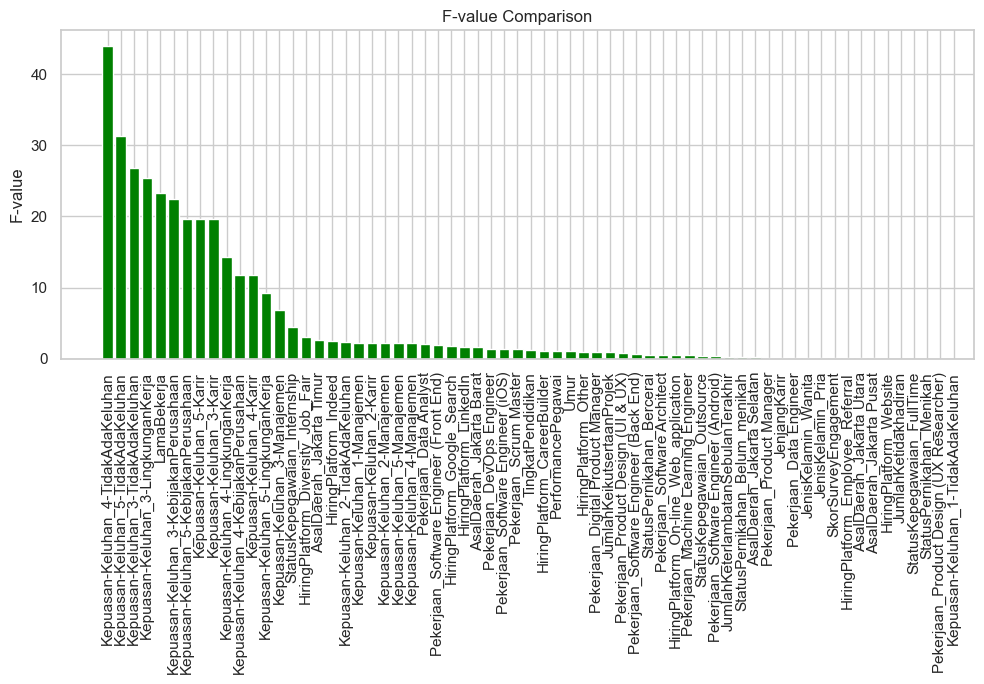

In [42]:
from sklearn.feature_selection import f_classif

f_value, _ = f_classif(X_train, y_train)

feature_scores = pd.DataFrame({
    "feature_names": X_train.columns,
    "feature_value": f_value
}).sort_values("feature_value", ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(data=feature_scores, x="feature_names", height="feature_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.tight_layout()
plt.show()

In [43]:
feature_importance = []
for i in feature_scores["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Kepuasan-Keluhan_4-TidakAdaKeluhan',
 'Kepuasan-Keluhan_5-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-LingkunganKerja',
 'LamaBekerja',
 'Kepuasan-Keluhan_3-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-Karir',
 'Kepuasan-Keluhan_3-Karir',
 'Kepuasan-Keluhan_4-LingkunganKerja']

#### Variance Threshold

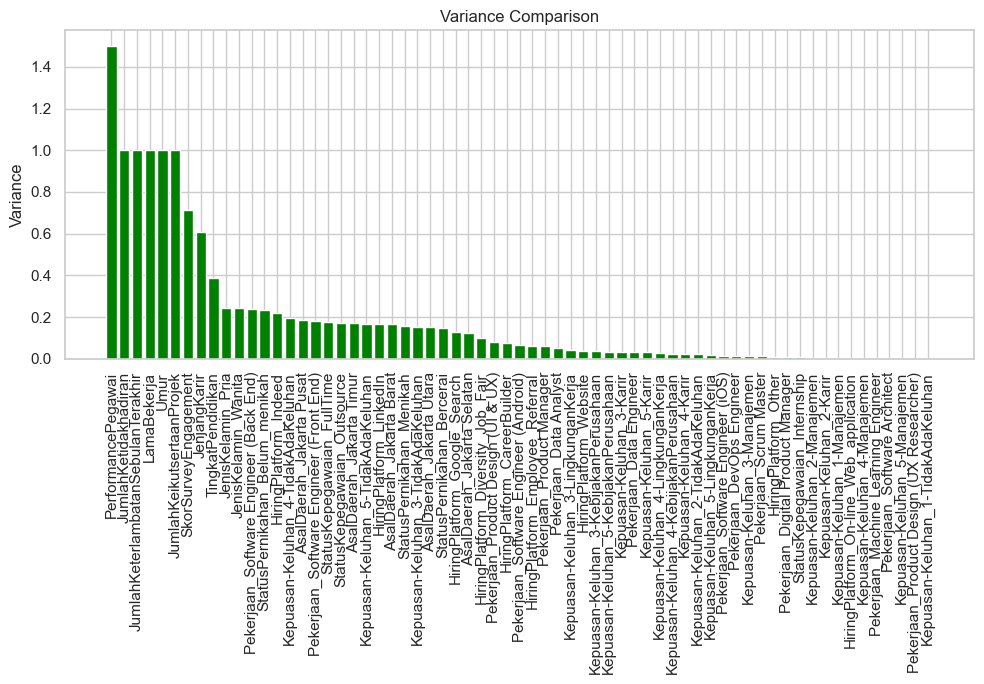

In [44]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_train_transformed = selector.fit_transform(X_train)

feature_scores = pd.DataFrame({
    "feature_names": X_train.columns,
    "variances": selector.variances_
}).sort_values("variances", ascending=False)

plt.figure(figsize=(10, 7))
plt.bar(data=feature_scores, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.tight_layout()
plt.show()

In [45]:
for i in feature_scores["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Kepuasan-Keluhan_4-TidakAdaKeluhan',
 'Kepuasan-Keluhan_5-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-LingkunganKerja',
 'LamaBekerja',
 'Kepuasan-Keluhan_3-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-Karir',
 'Kepuasan-Keluhan_3-Karir',
 'Kepuasan-Keluhan_4-LingkunganKerja',
 'PerformancePegawai',
 'JumlahKetidakhadiran',
 'JumlahKeterlambatanSebulanTerakhir',
 'Umur',
 'JumlahKeikutsertaanProjek',
 'SkorSurveyEngagement',
 'JenjangKarir',
 'TingkatPendidikan',
 'JenisKelamin_Pria']

#### Mutual Information

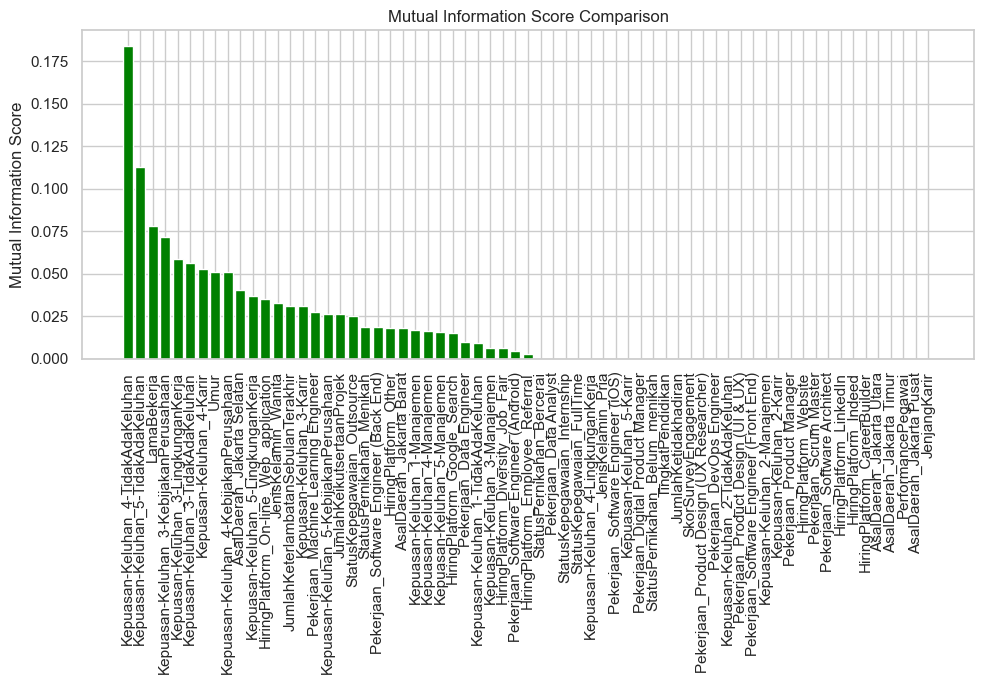

In [46]:
from sklearn.feature_selection import mutual_info_classif

MI_score = mutual_info_classif(X_train, y_train, random_state=0)

feature_scores = pd.DataFrame({
    "feature_names": X_train.columns,
    "MI_score": MI_score
}).sort_values("MI_score", ascending=False)

plt.figure(figsize=(10, 7))
plt.bar(data=feature_scores, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.tight_layout()
plt.show()

In [47]:
for i in feature_scores["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Kepuasan-Keluhan_4-TidakAdaKeluhan',
 'Kepuasan-Keluhan_5-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-LingkunganKerja',
 'LamaBekerja',
 'Kepuasan-Keluhan_3-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-Karir',
 'Kepuasan-Keluhan_3-Karir',
 'Kepuasan-Keluhan_4-LingkunganKerja',
 'PerformancePegawai',
 'JumlahKetidakhadiran',
 'JumlahKeterlambatanSebulanTerakhir',
 'Umur',
 'JumlahKeikutsertaanProjek',
 'SkorSurveyEngagement',
 'JenjangKarir',
 'TingkatPendidikan',
 'JenisKelamin_Pria',
 'Kepuasan-Keluhan_4-Karir',
 'Kepuasan-Keluhan_4-KebijakanPerusahaan',
 'AsalDaerah_Jakarta Selatan']

#### Select K-Best

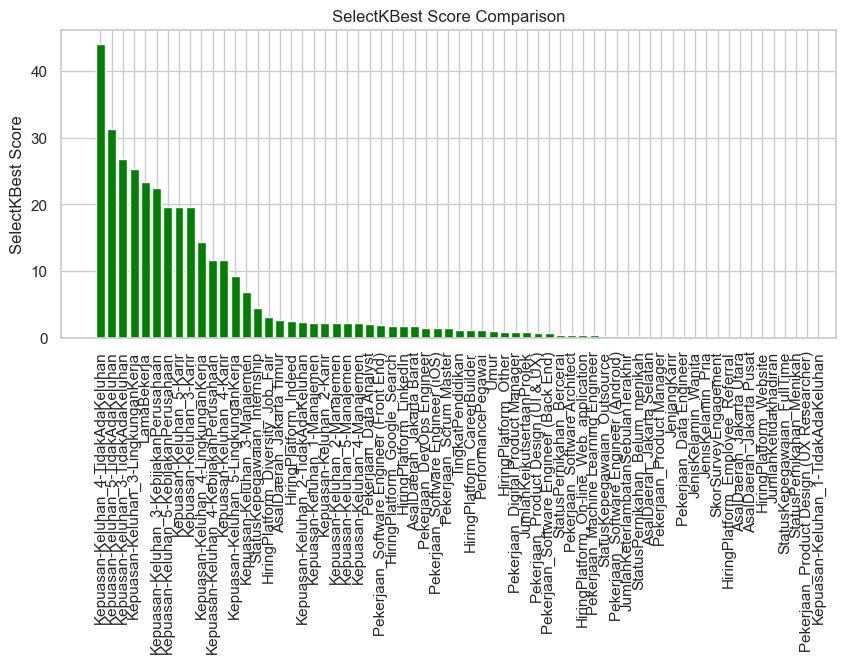

In [48]:
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Specs', 'Score']  
feature_scores.sort_values('Score', ascending=False, inplace=True)

plt.figure(figsize=(10, 4))
plt.bar(data=feature_scores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

In [49]:
for i in feature_scores["Specs"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Kepuasan-Keluhan_4-TidakAdaKeluhan',
 'Kepuasan-Keluhan_5-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-LingkunganKerja',
 'LamaBekerja',
 'Kepuasan-Keluhan_3-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-Karir',
 'Kepuasan-Keluhan_3-Karir',
 'Kepuasan-Keluhan_4-LingkunganKerja',
 'PerformancePegawai',
 'JumlahKetidakhadiran',
 'JumlahKeterlambatanSebulanTerakhir',
 'Umur',
 'JumlahKeikutsertaanProjek',
 'SkorSurveyEngagement',
 'JenjangKarir',
 'TingkatPendidikan',
 'JenisKelamin_Pria',
 'Kepuasan-Keluhan_4-Karir',
 'Kepuasan-Keluhan_4-KebijakanPerusahaan',
 'AsalDaerah_Jakarta Selatan']

#### Feature Importance by ExtraTreesClassifier

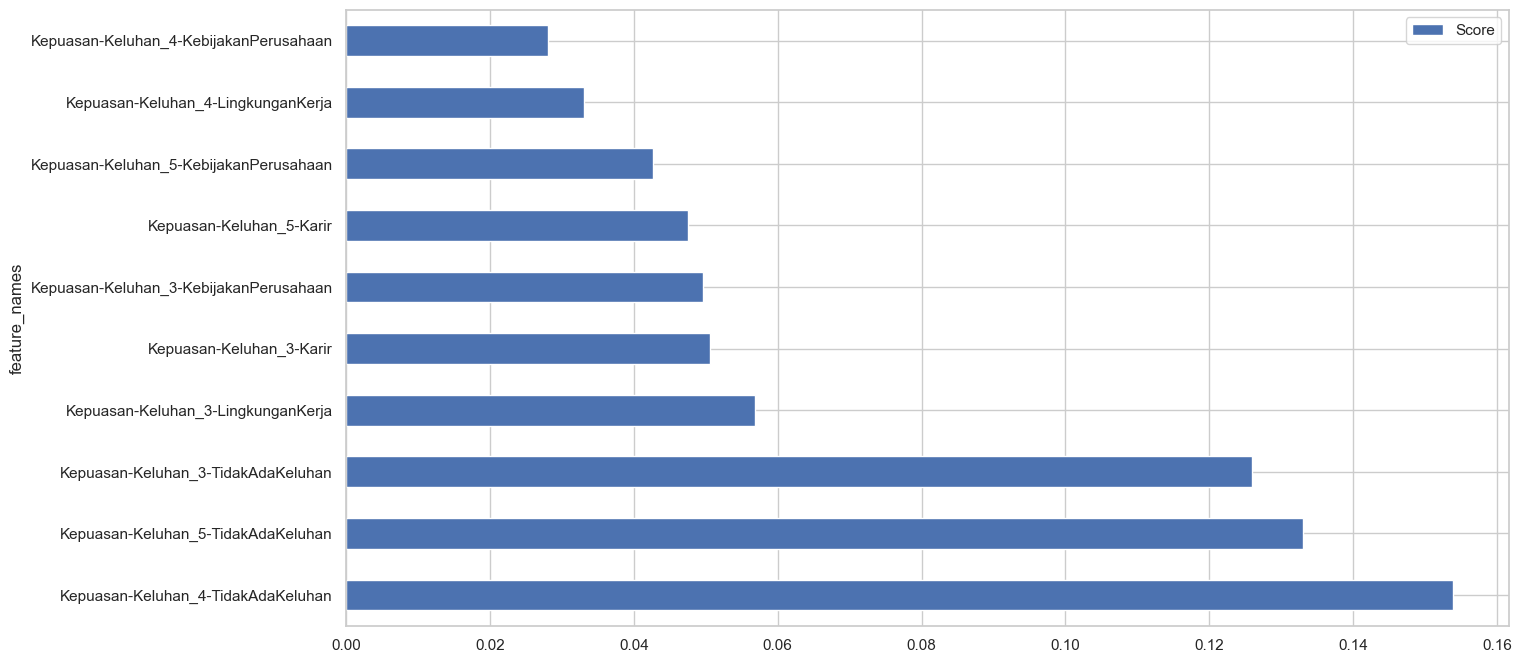

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

In [51]:
for i in feat_importances["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Kepuasan-Keluhan_4-TidakAdaKeluhan',
 'Kepuasan-Keluhan_5-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-LingkunganKerja',
 'LamaBekerja',
 'Kepuasan-Keluhan_3-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-Karir',
 'Kepuasan-Keluhan_3-Karir',
 'Kepuasan-Keluhan_4-LingkunganKerja',
 'PerformancePegawai',
 'JumlahKetidakhadiran',
 'JumlahKeterlambatanSebulanTerakhir',
 'Umur',
 'JumlahKeikutsertaanProjek',
 'SkorSurveyEngagement',
 'JenjangKarir',
 'TingkatPendidikan',
 'JenisKelamin_Pria',
 'Kepuasan-Keluhan_4-Karir',
 'Kepuasan-Keluhan_4-KebijakanPerusahaan',
 'AsalDaerah_Jakarta Selatan']

#### Heatmap

In [52]:
corr = df_train.corrwith(df_train["Attrition"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

,index,corr value,Corr Type
0,Attrition,1.00,Positif
1,Kepuasan-Keluhan_4-TidakAdaKeluhan,0.40,Negatif
2,Kepuasan-Keluhan_5-TidakAdaKeluhan,0.35,Negatif
3,Kepuasan-Keluhan_3-TidakAdaKeluhan,0.33,Negatif
4,Kepuasan-Keluhan_3-LingkunganKerja,0.32,Positif
5,LamaBekerja,0.31,Negatif
6,Kepuasan-Keluhan_3-KebijakanPerusahaan,0.30,Positif
7,Kepuasan-Keluhan_5-Karir,0.28,Positif
8,Kepuasan-Keluhan_3-Karir,0.28,Positif
9,Kepuasan-Keluhan_5-KebijakanPerusahaan,0.28,Positif


In [53]:
corr = df_train.corrwith(df_train["Attrition"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

target = "Attrition"
high_corr_cols = [i for i in list(corr[corr["corr value"] > -1]["index"].values) if i != target]

In [54]:
for i in corr["index"].values[:10]:
    if i not in feature_importance and not target:
        feature_importance.append(i)
feature_importance

['Kepuasan-Keluhan_4-TidakAdaKeluhan',
 'Kepuasan-Keluhan_5-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-TidakAdaKeluhan',
 'Kepuasan-Keluhan_3-LingkunganKerja',
 'LamaBekerja',
 'Kepuasan-Keluhan_3-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-KebijakanPerusahaan',
 'Kepuasan-Keluhan_5-Karir',
 'Kepuasan-Keluhan_3-Karir',
 'Kepuasan-Keluhan_4-LingkunganKerja',
 'PerformancePegawai',
 'JumlahKetidakhadiran',
 'JumlahKeterlambatanSebulanTerakhir',
 'Umur',
 'JumlahKeikutsertaanProjek',
 'SkorSurveyEngagement',
 'JenjangKarir',
 'TingkatPendidikan',
 'JenisKelamin_Pria',
 'Kepuasan-Keluhan_4-Karir',
 'Kepuasan-Keluhan_4-KebijakanPerusahaan',
 'AsalDaerah_Jakarta Selatan']

<Axes: >

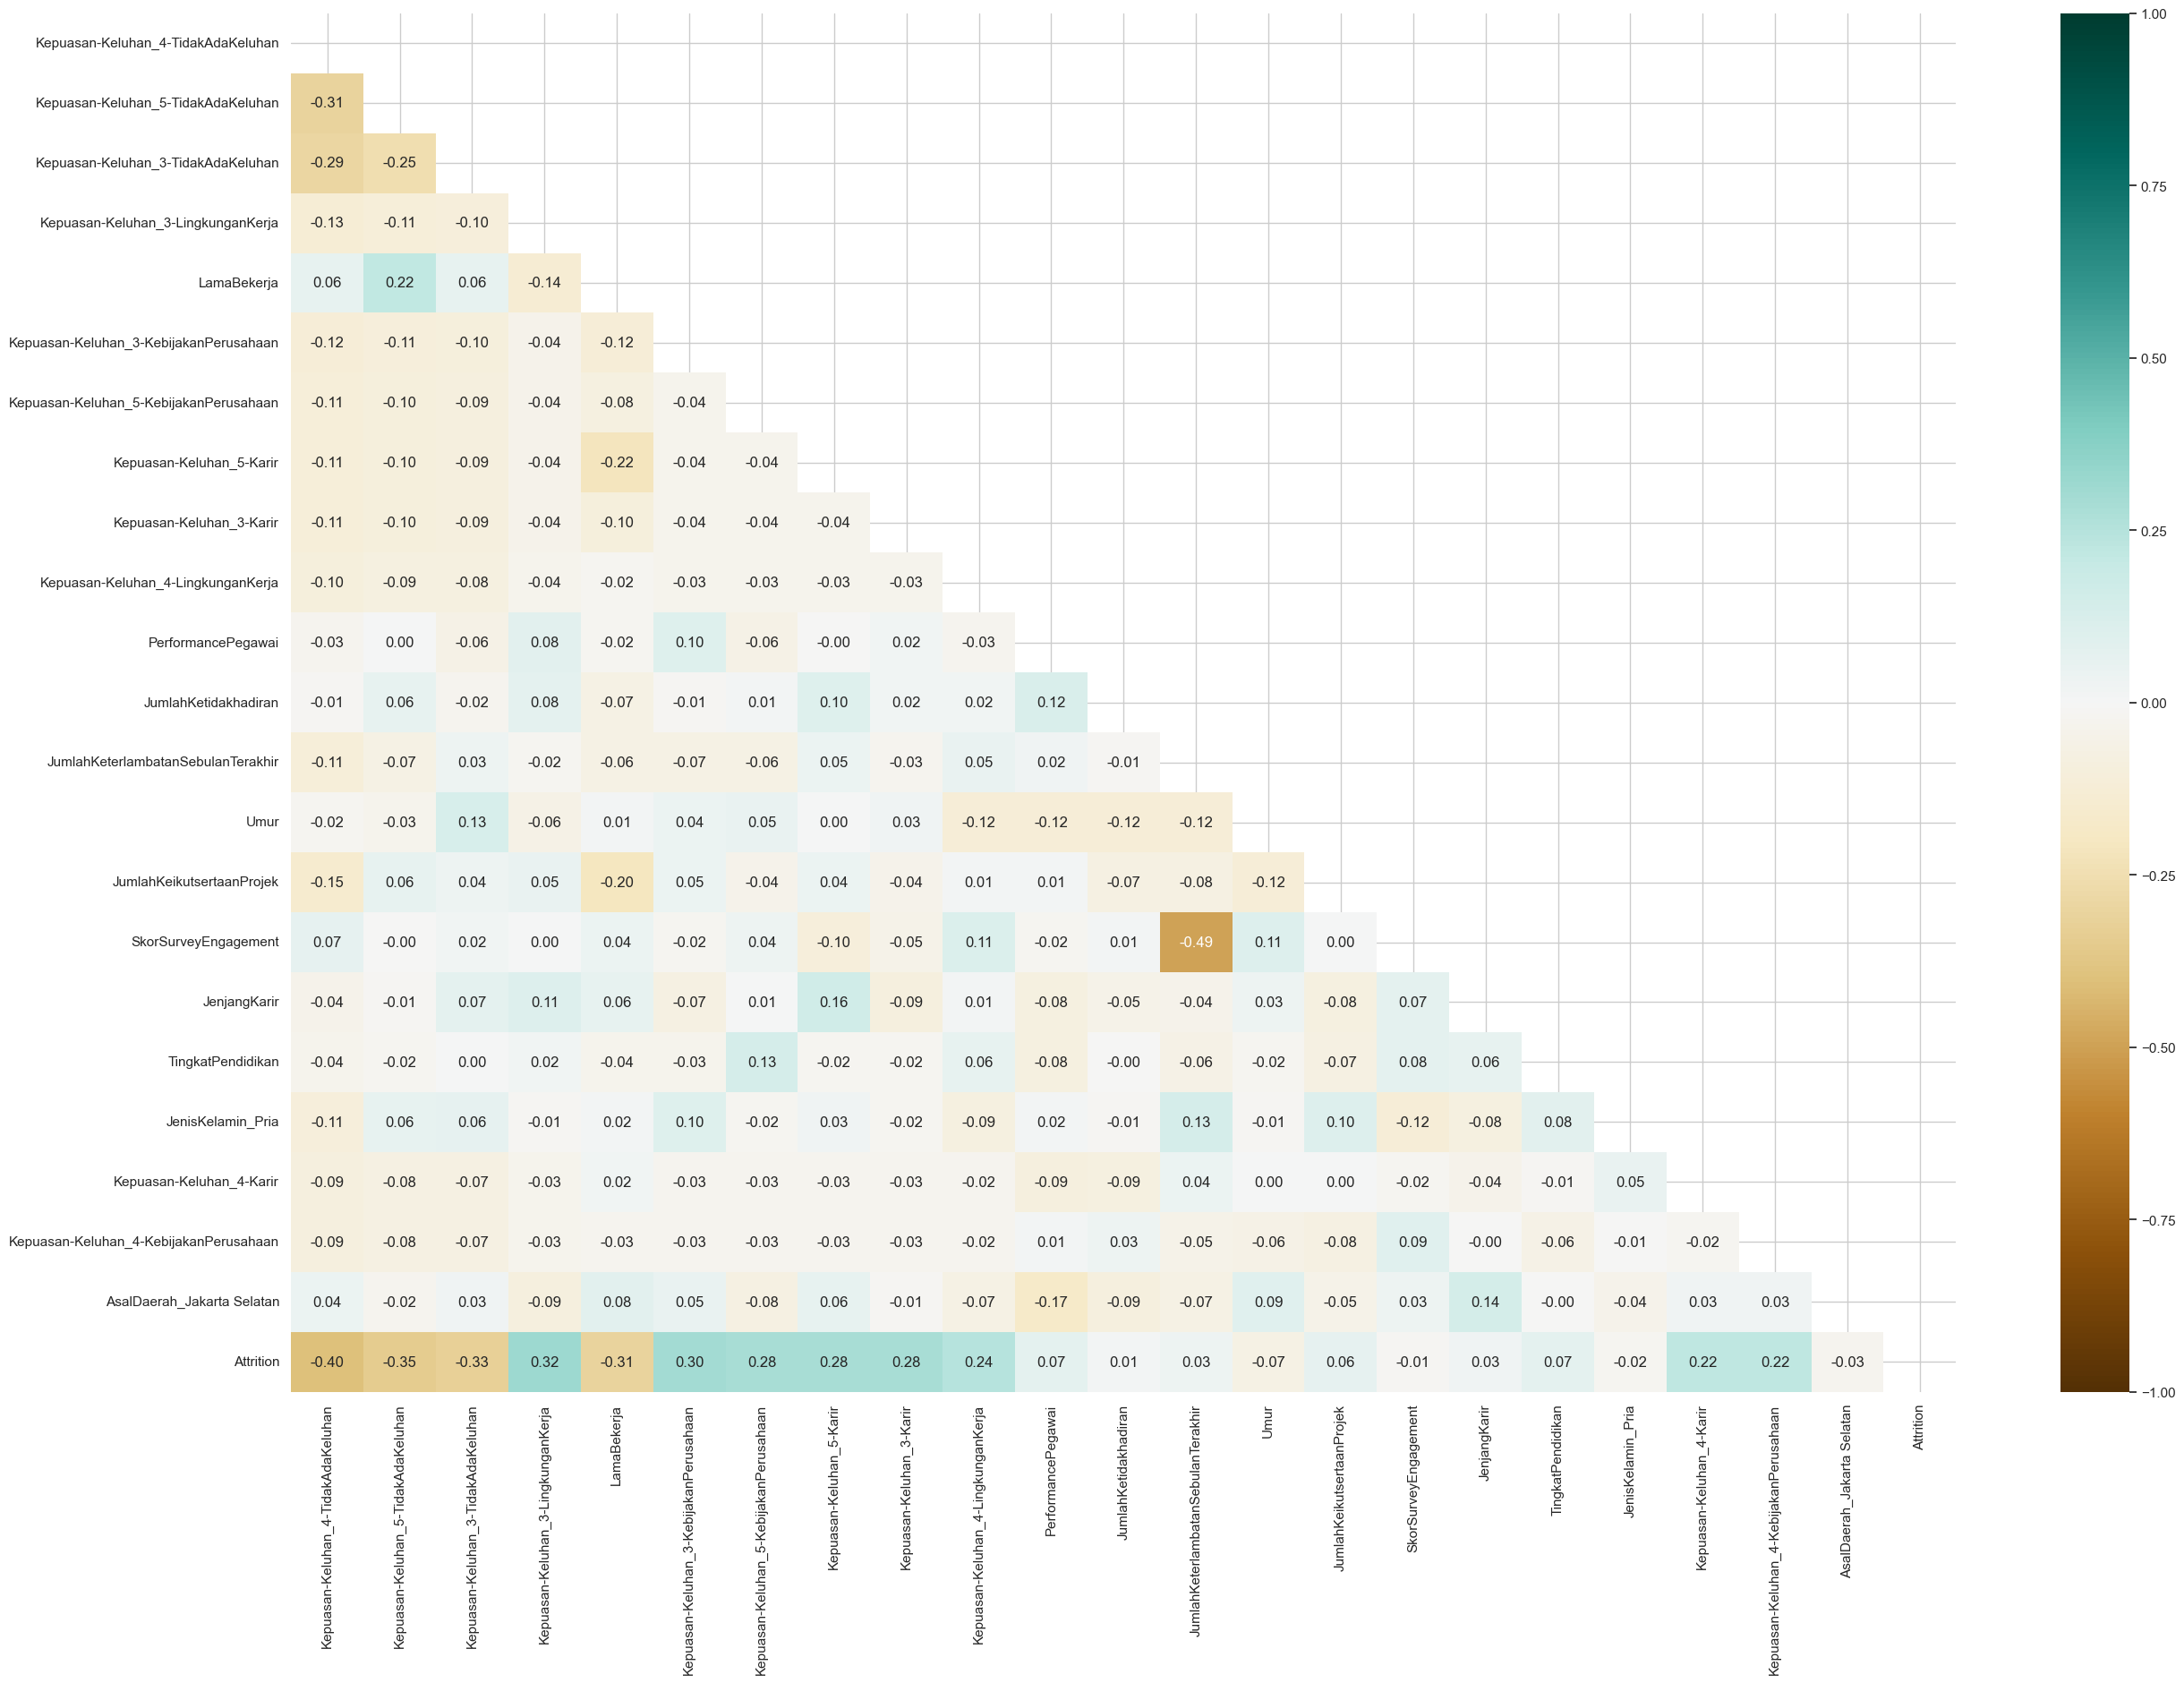

In [55]:
plt.figure(figsize=(30, 20))
corr = df_train[feature_importance+["Attrition"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', annot=True, fmt='.2f', mask=mask)

In [63]:
final_feature = ['Kepuasan-Keluhan_4-TidakAdaKeluhan', 'Kepuasan-Keluhan_5-TidakAdaKeluhan', 
                 'Kepuasan-Keluhan_3-TidakAdaKeluhan', 'Kepuasan-Keluhan_3-LingkunganKerja', 'LamaBekerja', 
                 'Kepuasan-Keluhan_3-KebijakanPerusahaan', 'Kepuasan-Keluhan_5-KebijakanPerusahaan', 'Kepuasan-Keluhan_5-Karir',
                 'Kepuasan-Keluhan_3-Karir', 'Kepuasan-Keluhan_4-LingkunganKerja', 'PerformancePegawai', 'JumlahKetidakhadiran',
                 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKeikutsertaanProjek', 'SkorSurveyEngagement', 'JenjangKarir', 
                 'Kepuasan-Keluhan_4-Karir', 'Kepuasan-Keluhan_4-KebijakanPerusahaan']

Excluding personal features such as place of origin, education level, age, and gender is done to prevent potential discrimination when there are employees with these characteristics. This ensures that the recommendations obtained after model development can be more in line with other features.

#### Define Feature and Target

In [64]:
X_train = df_train.drop(['Attrition'], axis=1)[final_feature].reset_index(drop=True) 
y_train = df_train['Attrition'].reset_index(drop=True) 
print(f'Shape of X_train and y_train: {X_train.shape, y_train.shape}')

X_test = df_test.drop(['Attrition'], axis=1)[final_feature].reset_index(drop=True) 
y_test = df_test['Attrition'].reset_index(drop=True) 
print(f'Shape of X_test and y_test: {X_test.shape, y_test.shape}')

X = df.drop(['Attrition'], axis=1)[final_feature].reset_index(drop=True) 
y = df['Attrition'].reset_index(drop=True) 
print(f'Shape of X and y: {X.shape, y.shape}')

Shape of X_train and y_train: ((227, 18), (227,))
Shape of X_test and y_test: ((58, 18), (58,))
Shape of X and y: ((285, 18), (285,))


### Handling Imbalance

Handling the imbalance is performed using oversampling with SMOTE, as there is a significant difference between employees who resign (30%) and those who do not (70%). The use of SMOTE also aims to avoid potential overfitting that may occur with regular oversampling.

In [61]:
df['Attrition'].value_counts()

0    196
1     89
Name: Attrition, dtype: int64

In [65]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

print(f'Target in Original Data:')
print(pd.Series(y_train).value_counts(), end='\n\n')
X_train, y_train = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train, y_train)
print('Target After Oversampling Using SMOTE:')
print(pd.Series(y_train).value_counts())

Target in Original Data:
0    156
1     71
Name: Attrition, dtype: int64

Target After Oversampling Using SMOTE:
0    156
1     78
Name: Attrition, dtype: int64


## Modeling

Machine Learning models to be created include:
1. Logistic Regression
2. k-Nearest Neighbors (kNN)
3. Decision Tree Classifier
4. Random Forest Classifier
5. AdaBoost Classifier
6. XGBoost Classifier
7. Gaussian Naive Bayes
8. Support Vector Machine
9. Neural Network Classifier
10. Gradient Boosting Classifier

In [66]:
# Define estimators for each model
lr_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train), random_state=42)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=2)
adaboost_model = AdaBoostClassifier(random_state=42)
xgboost_model = XGBClassifier(random_state=42)
nb_model = GaussianNB()
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
nn_model = MLPClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

In [94]:
train_classifier_list = []
train_modelname_list = []
train_metrics_list = []

test_classifier_list = []
test_modelname_list = []
test_metrics_list = []

In [68]:
def evaluate_model_performance(model, model_name, X_train, y_train, X_test, y_test, should_save=True):
    # Predict on the training data
    train_predictions = model.predict(X_train)
    train_pred_prob = model.predict_proba(X_train)
    
    # Predict on the testing data
    test_predictions = model.predict(X_test)
    test_pred_prob = model.predict_proba(X_test)
    
    # Perform cross-validation for F1 and ROC AUC metrics on the data
    cv_f1_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1', n_jobs=-1)
    cv_rocauc_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc', n_jobs=-1)
    cv_f1_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='f1', n_jobs=-1)
    cv_rocauc_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='roc_auc', n_jobs=-1)
    
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score,
        'ROC AUC': roc_auc_score
    }
    
    # Calculate various evaluation metrics on the training data
    train_metrics = {name: metric(y_train, train_predictions) for name, metric in metrics.items()}
    train_metrics['F1 Score (CV)'] = np.mean(cv_f1_train)
    train_metrics['ROC AUC (CV)'] = np.mean(cv_rocauc_train)
    
    # Calculate various evaluation metrics on the testing data
    test_metrics = {name: metric(y_test, test_predictions) for name, metric in metrics.items()}
    test_metrics['F1 Score (CV)'] = np.mean(cv_f1_test)
    test_metrics['ROC AUC (CV)'] = np.mean(cv_rocauc_test)
    
    if should_save:
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_metrics_list.append(train_metrics)
        
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_metrics_list.append(test_metrics)
        
    
    metrics_summary = pd.DataFrame({
        'Evaluation Metrics': list(metrics.keys()) + ['F1 Score (CV)', 'ROC AUC (CV)'],
        'Train': [train_metrics[name] for name in metrics.keys()] + [train_metrics['F1 Score (CV)'], train_metrics['ROC AUC (CV)']],
        'Test': [test_metrics[name] for name in metrics.keys()] + [test_metrics['F1 Score (CV)'], test_metrics['ROC AUC (CV)']]
    })
    
    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']
    return metrics_summary.style.background_gradient(cmap='YlOrBr')

#### Logistic Regression

In [69]:
lr_model = lr_model.fit(X_train, y_train)
evaluate_model_performance(lr_model, "Logistic Regression", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.978632,1.000000,-0.021368
1,Precision,0.950617,1.000000,-0.049383
2,Recall,0.987179,1.000000,-0.012821
3,F1 Score,0.968553,1.000000,-0.031447
4,ROC AUC,0.980769,1.000000,-0.019231
5,F1 Score (CV),0.933926,0.543333,0.390593
6,ROC AUC (CV),0.998437,nan,nan


#### k-Nearest Neighbors

In [70]:
knn_model = knn_model.fit(X_train, y_train)
evaluate_model_performance(knn_model, "K-Nearest Neighbors", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.846154,0.793103,0.053050
1,Precision,0.903846,0.800000,0.103846
2,Recall,0.602564,0.444444,0.158120
3,F1 Score,0.723077,0.571429,0.151648
4,ROC AUC,0.785256,0.697222,0.088034
5,F1 Score (CV),0.557753,0.150000,0.407753
6,ROC AUC (CV),0.807183,nan,nan


#### Decision Tree Classifier

In [71]:
dt_model = dt_model.fit(X_train, y_train)
evaluate_model_performance(dt_model, "Decision Tree", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.948276,0.051724
1,Precision,1.000000,0.894737,0.105263
2,Recall,1.000000,0.944444,0.055556
3,F1 Score,1.000000,0.918919,0.081081
4,ROC AUC,1.000000,0.947222,0.052778
5,F1 Score (CV),0.944091,0.613333,0.330758
6,ROC AUC (CV),0.954514,nan,nan


#### Random Forest Classifier

In [95]:
rf_model = rf_model.fit(X_train, y_train)
evaluate_model_performance(rf_model, "Random Forest", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.965517,0.034483
1,Precision,1.000000,0.900000,0.100000
2,Recall,1.000000,1.000000,0.000000
3,F1 Score,1.000000,0.947368,0.052632
4,ROC AUC,1.000000,0.975000,0.025000
5,F1 Score (CV),0.960582,0.643333,0.317249
6,ROC AUC (CV),0.999219,nan,nan


#### Adaboost Classifier

In [73]:
adaboost_model = adaboost_model.fit(X_train, y_train)
evaluate_model_performance(adaboost_model, "Adaboost Classifier", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.948276,0.051724
1,Precision,1.000000,0.894737,0.105263
2,Recall,1.000000,0.944444,0.055556
3,F1 Score,1.000000,0.918919,0.081081
4,ROC AUC,1.000000,0.947222,0.052778
5,F1 Score (CV),0.944091,0.766667,0.177425
6,ROC AUC (CV),0.982422,nan,nan


#### XGBoost Classifier

In [74]:
xgboost_model = xgboost_model.fit(X_train, y_train)
evaluate_model_performance(xgboost_model, "XGBoost Classifier", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.948276,0.051724
1,Precision,1.000000,0.894737,0.105263
2,Recall,1.000000,0.944444,0.055556
3,F1 Score,1.000000,0.918919,0.081081
4,ROC AUC,1.000000,0.947222,0.052778
5,F1 Score (CV),0.944091,0.596667,0.347425
6,ROC AUC (CV),0.995313,nan,nan


#### Gaussian Naive Bayes

In [75]:
nb_model = nb_model.fit(X_train, y_train)
evaluate_model_performance(nb_model, "Naive Bayes", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.923077,0.931034,-0.007958
1,Precision,1.000000,1.000000,0.000000
2,Recall,0.769231,0.777778,-0.008547
3,F1 Score,0.869565,0.875000,-0.005435
4,ROC AUC,0.884615,0.888889,-0.004274
5,F1 Score (CV),0.853333,0.493333,0.360000
6,ROC AUC (CV),0.999219,nan,nan


#### Support Vector Machine

In [76]:
svm_model = svc_model.fit(X_train, y_train)
evaluate_model_performance(svm_model, "Support Vector Machine", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.970085,0.982759,-0.012673
1,Precision,1.000000,1.000000,0.000000
2,Recall,0.910256,0.944444,-0.034188
3,F1 Score,0.953020,0.971429,-0.018408
4,ROC AUC,0.955128,0.972222,-0.017094
5,F1 Score (CV),0.883095,0.000000,0.883095
6,ROC AUC (CV),0.995434,nan,nan


#### Neural Network Classifier

In [77]:
nn_model = nn_model.fit(X_train, y_train)
evaluate_model_performance(nn_model, "Neural Network Classifier", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.991453,0.965517,0.025936
1,Precision,0.987179,0.900000,0.087179
2,Recall,0.987179,1.000000,-0.012821
3,F1 Score,0.987179,0.947368,0.039811
4,ROC AUC,0.990385,0.975000,0.015385
5,F1 Score (CV),0.946223,0.660000,0.286223
6,ROC AUC (CV),0.998889,nan,nan


#### Gradient Boosting Classifier

In [78]:
gb_model = gb_model.fit(X_train, y_train)
evaluate_model_performance(gb_model, "GradientBoosting Classifier", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.948276,0.051724
1,Precision,1.000000,0.894737,0.105263
2,Recall,1.000000,0.944444,0.055556
3,F1 Score,1.000000,0.918919,0.081081
4,ROC AUC,1.000000,0.947222,0.052778
5,F1 Score (CV),0.958377,0.666667,0.291711
6,ROC AUC (CV),0.998047,nan,nan


#### Each Model's Performance

In [79]:
results_eval = pd.DataFrame({
    "Models": test_modelname_list,
    "Accuracy (Train)": [metrics['Accuracy'] for metrics in train_metrics_list],
    "Accuracy (Test)": [metrics['Accuracy'] for metrics in test_metrics_list],
    "Precision (Train)": [metrics['Precision'] for metrics in train_metrics_list],
    "Precision (Test)": [metrics['Precision'] for metrics in test_metrics_list],
    "Recall (Train)": [metrics['Recall'] for metrics in train_metrics_list],
    "Recall (Test)": [metrics['Recall'] for metrics in test_metrics_list],
    "F1 Score (Train)": [metrics['F1 Score'] for metrics in train_metrics_list],
    "F1 Score (Test)": [metrics['F1 Score'] for metrics in test_metrics_list]
})

results_eval.drop_duplicates(inplace=True)

results_eval.sort_values(by=["Recall (Test)", "Accuracy (Test)", "F1 Score (Test)", "Precision (Test)"], ascending=[False, False, False, False]).reset_index(drop=True)
results_eval_styled = results_eval.style.background_gradient(cmap='YlOrBr')
results_eval_styled

,Models,Accuracy (Train),Accuracy (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1 Score (Train),F1 Score (Test)
0,Logistic Regression,0.978632,1.000000,0.950617,1.000000,0.987179,1.000000,0.968553,1.000000
1,K-Nearest Neighbors,0.846154,0.793103,0.903846,0.800000,0.602564,0.444444,0.723077,0.571429
2,Decision Tree,1.000000,0.948276,1.000000,0.894737,1.000000,0.944444,1.000000,0.918919
3,Random Forest,1.000000,0.965517,1.000000,0.900000,1.000000,1.000000,1.000000,0.947368
4,Adaboost Classifier,1.000000,0.948276,1.000000,0.894737,1.000000,0.944444,1.000000,0.918919
5,XGBoost Classifier,1.000000,0.948276,1.000000,0.894737,1.000000,0.944444,1.000000,0.918919
6,Naive Bayes,0.923077,0.931034,1.000000,1.000000,0.769231,0.777778,0.869565,0.875000
7,Support Vector Machine,0.970085,0.982759,1.000000,1.000000,0.910256,0.944444,0.953020,0.971429
8,Neural Network Classifier,0.991453,0.965517,0.987179,0.900000,0.987179,1.000000,0.987179,0.947368
9,GradientBoosting Classifier,1.000000,0.948276,1.000000,0.894737,1.000000,0.944444,1.000000,0.918919


**Summary:**
The top-performing model is the Random Forest Classifier, as it exhibits the best recall performance on both the training and testing data.

### Hyperparameter Tuning

Hyperparameter tuning is performed on the best model, which is the Random Forest, using the `Grid Search` and `Random Search` methods.

In [80]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

#### Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

scorer = make_scorer(recall_score)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring=scorer)
grid_search.fit(X_train, y_train)

best_model_grid = grid_search.best_estimator_
recall = recall_score(y_test, best_model.predict(X_test))

print("Best Model:", grid_search.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Model: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features='auto',
                                        n_estimators=200))])


In [96]:
evaluate_model_performance(best_model, "RF HT Grid Search", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.965517,0.034483
1,Precision,1.000000,0.900000,0.100000
2,Recall,1.000000,1.000000,0.000000
3,F1 Score,1.000000,0.947368,0.052632
4,ROC AUC,1.000000,0.975000,0.025000
5,F1 Score (CV),0.955904,0.606667,0.349237
6,ROC AUC (CV),0.999219,nan,nan


#### Random Search

In [91]:
from sklearn.model_selection import RandomizedSearchCV

scorer = make_scorer(recall_score)
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

best_model_random = random_search.best_estimator_
recall = recall_score(y_test, best_model.predict(X_test))

print("Best Model:", random_search.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=30, n_estimators=200))])


In [97]:
evaluate_model_performance(best_model_random, "RF HT Random Search", X_train, y_train, X_test, y_test)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.965517,0.034483
1,Precision,1.000000,0.900000,0.100000
2,Recall,1.000000,1.000000,0.000000
3,F1 Score,1.000000,0.947368,0.052632
4,ROC AUC,1.000000,0.975000,0.025000
5,F1 Score (CV),0.943404,0.606667,0.336737
6,ROC AUC (CV),0.999219,nan,nan


#### Random Forest Performance Before and After Tuning

In [98]:
results_eval_ht = pd.DataFrame({
    "Models": test_modelname_list,
    "Accuracy (Train)": [metrics['Accuracy'] for metrics in train_metrics_list],
    "Accuracy (Test)": [metrics['Accuracy'] for metrics in test_metrics_list],
    "Precision (Train)": [metrics['Precision'] for metrics in train_metrics_list],
    "Precision (Test)": [metrics['Precision'] for metrics in test_metrics_list],
    "Recall (Train)": [metrics['Recall'] for metrics in train_metrics_list],
    "Recall (Test)": [metrics['Recall'] for metrics in test_metrics_list],
    "F1 Score (Train)": [metrics['F1 Score'] for metrics in train_metrics_list],
    "F1 Score (Test)": [metrics['F1 Score'] for metrics in test_metrics_list]
})

results_eval_ht.drop_duplicates(inplace=True)

results_eval_ht.sort_values(by=["Recall (Test)", "Accuracy (Test)", "F1 Score (Test)", "Precision (Test)"], ascending=[False, False, False, False]).reset_index(drop=True)
results_eval_styled = results_eval_ht.style.background_gradient(cmap='YlOrBr')
results_eval_styled

,Models,Accuracy (Train),Accuracy (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1 Score (Train),F1 Score (Test)
0,Random Forest,1.000000,0.965517,1.000000,0.900000,1.000000,1.000000,1.000000,0.947368
1,RF HT Grid Search,1.000000,0.965517,1.000000,0.900000,1.000000,1.000000,1.000000,0.947368
2,RF HT Random Search,1.000000,0.965517,1.000000,0.900000,1.000000,1.000000,1.000000,0.947368


**Summary:**
Both before and after hyperparameter tuning using grid search and random search, the models exhibit similar performance across all metrics. This is because from the beginning, the models were configured to use cross-validation, ensuring that the performance of the models before tuning was already optimized. The chosen model is the untuned random forest, as this decision was made to streamline the analysis process and save time.

### Model Evaluation

In [99]:
def evaluate_model(X, y, model, model_name, y_pred, y_pred_prob, title):
    accuracy = round(accuracy_score(y, y_pred), 2)
    precision = round(precision_score(y, y_pred), 2)
    recall = round(recall_score(y, y_pred), 2)
    f1_s = round(f1_score(y, y_pred), 2)
    rocauc_score = round(roc_auc_score(y, y_pred_prob[:, 1]), 2)

    cv_score_f1 = cross_validate(model, X, y, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 2)

    cv_score_rocauc = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 2)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y, y_pred))

    conf_matrix = pd.DataFrame((confusion_matrix(y, y_pred)), ('No-Attrition', 'Attrition'), ('No-Attrition', 'Attrition'))
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    print("Actual Data")
    print("Total =", len(y))
    print("No-Attrition =", len(y[y == 0]))
    print("Attrition =", len(y[y == 1]))
    print("Predicted Data")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y, y_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='YlOrBr')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title(f'Confusion Matrix for {title}\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y, y_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Accuracy = 0.99
Precision = 0.98
Recall = 1.0
F1 Score = 0.99
Cross Val F1 (k=5) = 1.0
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       196
           1       0.98      1.00      0.99        89

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

Actual Data
Total = 285
No-Attrition = 196
Attrition = 89
Predicted Data
TP = 89, FP = 2, TN = 194, FN = 0
Predictly Correct = 283
Predictly Wrong = 2 



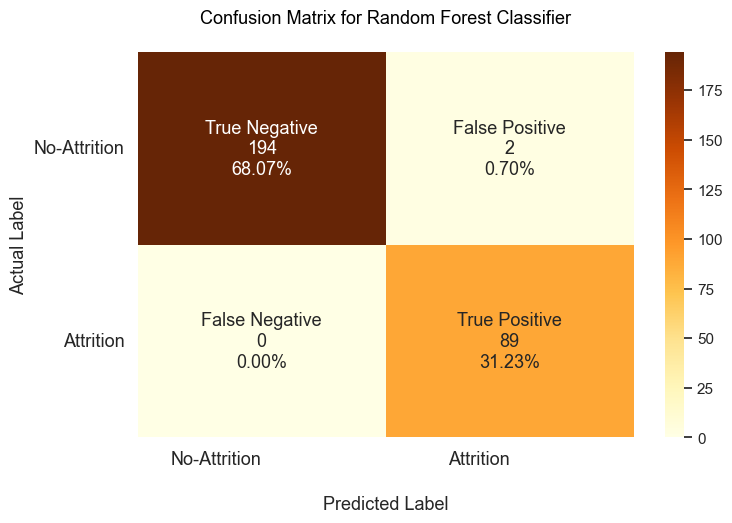

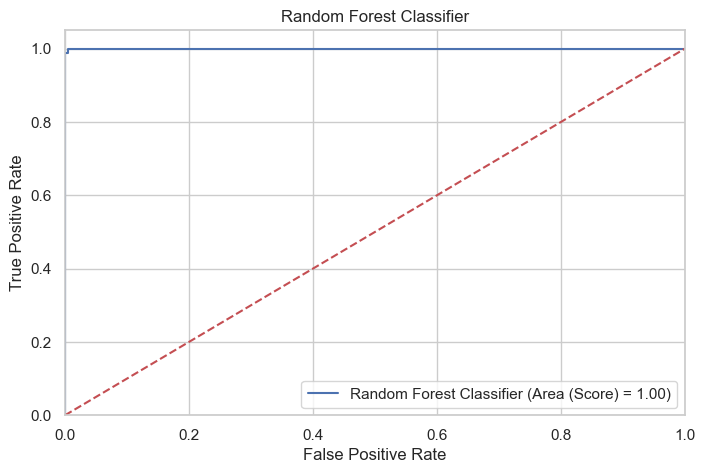

In [100]:
# Generate predictions
y_pred = rf_model.predict(X)
y_pred_prob = rf_model.predict_proba(X)

# Call the evaluation function for training
evaluate_model(X, y, rf_model, 'Random Forest Classifier', y_pred, y_pred_prob, 'Random Forest Classifier')

**Summary:**
The ROC AUC value of the selected model is 1, indicating that the model performs very well in distinguishing between positive and negative classes.

### Feature Importance

In [101]:
def shap_plot(model, model_name, data=None):

    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)

    tree = ["Decision Tree", "Random Forest", "XGBoost Classifier", "Gradient Boosting Classifier"]

    shap.initjs()

    if model_name in tree:

        if model_name in ["XGBoost Classifier", "Gradient Boosting Classifier"] :
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)
            expected = explainer.expected_value
        else:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)[1]
            expected = explainer.expected_value[1]


        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values, data, show = False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout()
        plt.show()

        return shap.force_plot(expected, shap_values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

    else :
        explainer = shap.Explainer(model.predict, data)
        shap_values = explainer(data)

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values.values, data, show = False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values.values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout()
        plt.show()

        return shap.force_plot(shap_values.base_values[0], shap_values.values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

Permutation explainer: 235it [02:41,  1.45it/s]                         


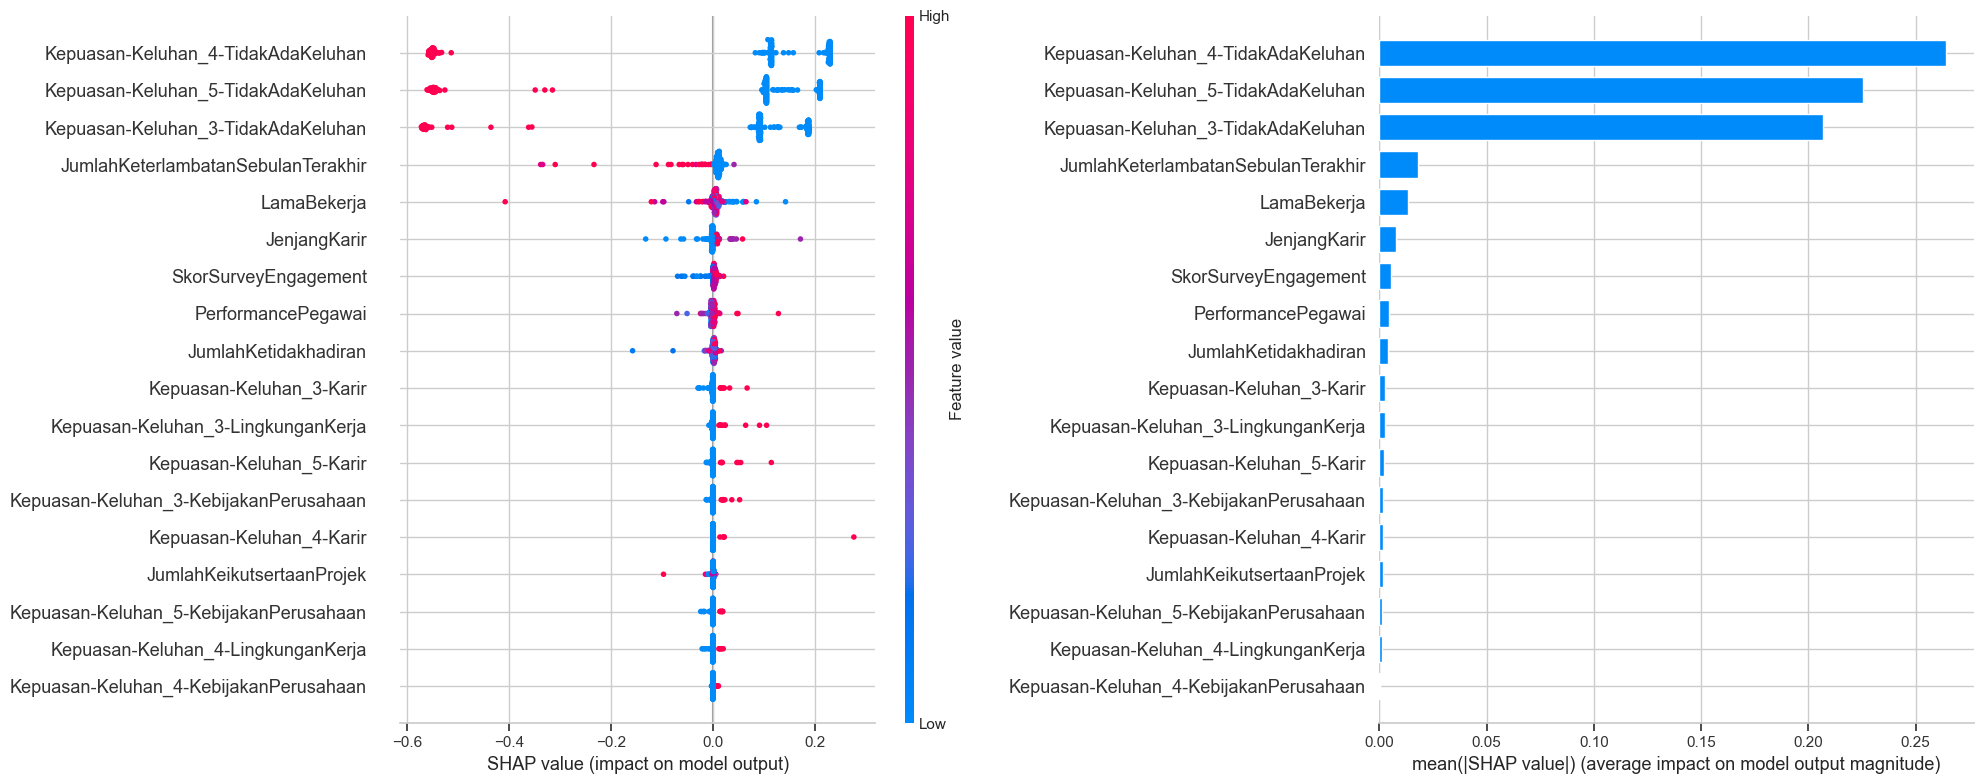

In [102]:
shap_plot(rf_model, "Random Forest Classifier", X_train)

**Summary:**
The three most important features obtained from the model are `Kepuasan-Keluhan_4-TidakAdaKeluhan`, `Kepuasan-Keluhan_5-TidakAdaKeluhan`, and `Kepuasan-Keluhan_3-TidakAdaKeluhan`. Their feature values lean to the left, indicating that if there are no complaints and the satisfaction scores given by employees range from 3 to 5, employees tend to avoid attrition. Therefore, the recommendation that can be provided is to Increase Employee Satisfaction: Focus on improving employee satisfaction by actively seeking input and feedback from them. Actively seek input from employees and promptly address any necessary improvements. Ensure they feel heard, and that their complaints are taken seriously.